In [7]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import boston_housing
from keras import models
from keras import layers

In [55]:
(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()
train_data.shape

mean = train_data.mean(axis=0)
std  = train_data.std(axis=0)

train_data -= mean
train_data /= std

test_data -= mean
test_data /= std

In [56]:
def get_built_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(13,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [57]:
foldsNumber     = 4
foldSize        = (len(train_data)) // foldsNumber
epochs          = 500
scores          = []
maeHistories    = []

for fold in range(foldsNumber):
    print('fold #{}'.format(fold))
    validationFoldX = train_data[fold * foldSize: (fold + 1) * foldSize]
    validationFoldY = train_targets[fold * foldSize : (fold + 1) * foldSize]
    
    foldsXExcludingValidation = np.concatenate([
        train_data[:fold * foldSize],
        train_data[(fold + 1) * foldSize:]
    ],axis=0)
    
    foldsYExcludingValidation = np.concatenate([
        train_targets[:fold * foldSize],
        train_targets[(fold + 1) * foldSize:]
    ],axis=0)
    
    model = get_built_model()
    history = model.fit(foldsXExcludingValidation, foldsYExcludingValidation, epochs=epochs, batch_size=1, verbose= 0)
    mse,mae = model.evaluate(validationFoldX, validationFoldY)
    scores.append(mae)
    
    maeHistories.append(history.history['loss'])
    print('current fold MAE is {}'.format(mae))
  
    


fold #0


 32/101 [========>.....................] - ETA: 0s

101/101 [==============================] - 0s 1ms/step


current fold MAE is 2.5019403188535483
fold #1


 32/101 [========>.....................] - ETA: 0s

101/101 [==============================] - 0s 1ms/step


current fold MAE is 2.908111863797254
fold #2


 32/101 [========>.....................] - ETA: 0s

101/101 [==============================] - 0s 1ms/step


current fold MAE is 2.6430888459233954
fold #3


 32/101 [========>.....................] - ETA: 0s

101/101 [==============================] - 0s 1ms/step


current fold MAE is 2.570200308714763


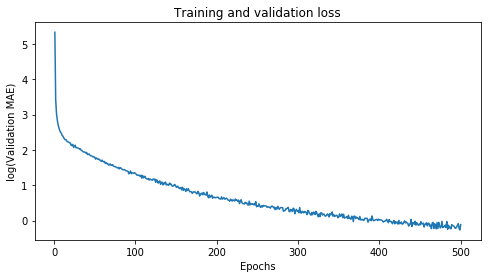

In [63]:

averageHistories = [np.log(np.mean([history[i] for history in maeHistories])) for i in range(epochs)]


f, left = plt.subplots(1, 1)
f.set_size_inches(8,4)

left.plot(range(1, len(averageHistories) + 1), averageHistories)
left.set_title('Training and validation loss')
left.set_xlabel('Epochs')
left.set_ylabel('log(Validation MAE)')

plt.show()


In [62]:
model = get_built_model()
model.fit(
    train_data, 
    train_targets,
    epochs=500, batch_size=16
)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

Epoch 1/500


 16/404 [>.............................] - ETA: 9s - loss: 841.5117 - mean_absolute_error: 27.2866

404/404 [==============================] - 0s 1ms/step - loss: 480.0347 - mean_absolute_error: 19.9655


Epoch 2/500
 16/404 [>.............................] - ETA: 0s - loss: 287.2448 - mean_absolute_error: 15.8593

404/404 [==============================] - 0s 110us/step - loss: 285.4733 - mean_absolute_error: 14.6976


Epoch 3/500
 16/404 [>.............................] - ETA: 0s - loss: 83.6339 - mean_absolute_error: 7.9585

404/404 [==============================] - 0s 127us/step - loss: 114.6155 - mean_absolute_error: 8.3183


Epoch 4/500
 16/404 [>.............................] - ETA: 0s - loss: 75.9593 - mean_absolute_error: 5.7845

404/404 [==============================] - 0s 133us/step - loss: 45.4996 - mean_absolute_error: 4.9930


Epoch 5/500
 16/404 [>.............................] - ETA: 0s - loss: 21.6363 - mean_absolute_error: 3.5643

404/404 [==============================] - 0s 123us/step - loss: 29.2706 - mean_absolute_error: 3.8725


Epoch 6/500
 16/404 [>.............................] - ETA: 0s - loss: 16.0198 - mean_absolute_error: 3.5875

404/404 [==============================] - 0s 115us/step - loss: 22.8025 - mean_absolute_error: 3.3602


Epoch 7/500
 16/404 [>.............................] - ETA: 0s - loss: 13.2416 - mean_absolute_error: 3.0603

404/404 [==============================] - 0s 115us/step - loss: 19.8938 - mean_absolute_error: 3.1107


Epoch 8/500
 16/404 [>.............................] - ETA: 0s - loss: 21.9557 - mean_absolute_error: 3.8288



404/404 [==============================] - 0s 124us/step - loss: 17.8432 - mean_absolute_error: 2.8920


Epoch 9/500


 16/404 [>.............................] - ETA: 0s - loss: 11.3117 - mean_absolute_error: 2.7789

404/404 [==============================] - 0s 117us/step - loss: 16.2316 - mean_absolute_error: 2.7930


Epoch 10/500


 16/404 [>.............................]

 - ETA: 0s - loss: 8.4065 - mean_absolute_error: 2.2907

404/404 [==============================] - 0s 131us/step - loss: 15.2238 - mean_absolute_error: 2.6859


Epoch 11/500
 16/404 [>.............................] - ETA: 0s - loss: 10.9294 - mean_absolute_error: 2.1549

404/404 [==============================] - 0s 124us/step - loss: 14.0178 - mean_absolute_error: 2.5788


Epoch 12/500
 16/404 [>.............................] - ETA: 0s - loss: 10.5465 - mean_absolute_error: 2.4661

404/404 [==============================] - 0s 130us/step - loss: 13.3491 - mean_absolute_error: 2.5703


Epoch 13/500
 16/404 [>.............................] - ETA: 0s - loss: 6.6883 - mean_absolute_error: 2.1221

404/404 [==============================] - 0s 118us/step - loss: 12.8184 - mean_absolute_error: 2.5058


Epoch 14/500
 16/404 [>.............................] - ETA: 0s - loss: 13.0463 - mean_absolute_error: 2.6783

404/404 [==============================] - 0s 121us/step - loss: 12.4044 - mean_absolute_error: 2.4741


Epoch 15/500
 16/404 [>.............................] - ETA: 0s - loss: 20.2523 - mean_absolute_error: 3.1491



404/404 [==============================] - 0s 116us/step - loss: 11.8432 - mean_absolute_error: 2.4266


Epoch 16/500
 16/404 [>.............................] - ETA: 0s - loss: 11.3740 - mean_absolute_error: 2.4638

404/404 [==============================] - 0s 105us/step - loss: 11.6629 - mean_absolute_error: 2.4181


Epoch 17/500
 16/404 [>.............................] - ETA: 0s - loss: 5.6472 - mean_absolute_error: 1.7947

404/404 [==============================] - 0s 111us/step - loss: 11.0679 - mean_absolute_error: 2.3815


Epoch 18/500
 16/404 [>.............................] - ETA: 0s - loss: 5.3508 - mean_absolute_error: 1.8111

404/404 [==============================] - 0s 104us/step - loss: 11.2432 - mean_absolute_error: 2.3682


Epoch 19/500
 16/404 [>.............................] - ETA: 0s - loss: 2.8363 - mean_absolute_error: 1.2605

404/404 [==============================] - 0s 109us/step - loss: 10.5958 - mean_absolute_error: 2.3014


Epoch 20/500
 16/404 [>.............................] - ETA: 0s - loss: 7.2671 - mean_absolute_error: 2.1345

404/404 [==============================] - 0s 109us/step - loss: 10.8216 - mean_absolute_error: 2.3348


Epoch 21/500
 16/404 [>.............................] - ETA: 0s - loss: 6.8397 - mean_absolute_error: 1.8613

404/404 [==============================] - 0s 101us/step - loss: 10.4687 - mean_absolute_error: 2.2721


Epoch 22/500
 16/404 [>.............................] - ETA: 0s - loss: 5.5425 - mean_absolute_error: 1.8701

404/404 [==============================] - 0s 104us/step - loss: 10.0834 - mean_absolute_error: 2.2408


Epoch 23/500
 16/404 [>.............................] - ETA: 0s - loss: 11.4188 - mean_absolute_error: 2.6250

404/404 [==============================] - 0s 97us/step - loss: 10.1144 - mean_absolute_error: 2.2463


Epoch 24/500
 16/404 [>.............................] - ETA: 0s - loss: 12.7681 - mean_absolute_error: 2.3213

404/404 [==============================] - 0s 107us/step - loss: 9.5422 - mean_absolute_error: 2.2072


Epoch 25/500
 16/404 [>.............................] - ETA: 0s - loss: 11.5468 - mean_absolute_error: 2.2666

404/404 [==============================] - 0s 97us/step - loss: 9.5447 - mean_absolute_error: 2.1951


Epoch 26/500
 16/404 [>.............................] - ETA: 0s - loss: 19.5424 - mean_absolute_error: 3.1928

404/404 [==============================] - 0s 102us/step - loss: 9.6277 - mean_absolute_error: 2.1833


Epoch 27/500
 16/404 [>.............................] - ETA: 0s - loss: 11.2449 - mean_absolute_error: 2.6631

404/404 [==============================] - 0s 103us/step - loss: 9.4296 - mean_absolute_error: 2.1809


Epoch 28/500
 16/404 [>.............................] - ETA: 0s - loss: 6.2301 - mean_absolute_error: 2.2121

404/404 [==============================] - 0s 105us/step - loss: 9.3594 - mean_absolute_error: 2.1827


Epoch 29/500
 16/404 [>.............................] - ETA: 0s - loss: 8.4239 - mean_absolute_error: 2.2601

404/404 [==============================] - 0s 102us/step - loss: 9.1630 - mean_absolute_error: 2.1765


Epoch 30/500
 16/404 [>.............................] - ETA: 0s - loss: 9.8608 - mean_absolute_error: 2.5916

404/404 [==============================] - 0s 102us/step - loss: 9.2771 - mean_absolute_error: 2.1549


Epoch 31/500
 16/404 [>.............................] - ETA: 0s - loss: 4.1176 - mean_absolute_error: 1.6525

404/404 [==============================] - 0s 96us/step - loss: 9.0336 - mean_absolute_error: 2.1612


Epoch 32/500
 16/404 [>.............................] - ETA: 0s - loss: 7.3012 - mean_absolute_error: 2.2337

404/404 [==============================] - 0s 110us/step - loss: 8.9013 - mean_absolute_error: 2.1485


Epoch 33/500
 16/404 [>.............................] - ETA: 0s - loss: 11.1196 - mean_absolute_error: 2.4414

404/404 [==============================] - 0s 99us/step - loss: 8.6963 - mean_absolute_error: 2.1329


Epoch 34/500
 16/404 [>.............................] - ETA: 0s - loss: 2.3664 - mean_absolute_error: 1.3612

404/404 [==============================] - 0s 98us/step - loss: 8.4241 - mean_absolute_error: 2.0735


Epoch 35/500
 16/404 [>.............................] - ETA: 0s - loss: 5.3653 - mean_absolute_error: 1.9380

404/404 [==============================] - 0s 101us/step - loss: 8.5097 - mean_absolute_error: 2.0670


Epoch 36/500
 16/404 [>.............................] - ETA: 0s - loss: 3.4140 - mean_absolute_error: 1.3708

404/404 [==============================] - 0s 100us/step - loss: 8.4614 - mean_absolute_error: 2.0747


Epoch 37/500
 16/404 [>.............................] - ETA: 0s - loss: 2.8083 - mean_absolute_error: 1.2496

404/404 [==============================] - 0s 105us/step - loss: 8.6457 - mean_absolute_error: 2.0829


Epoch 38/500
 16/404 [>.............................] - ETA: 0s - loss: 2.8578 - mean_absolute_error: 1.3882

404/404 [==============================] - 0s 100us/step - loss: 8.2604 - mean_absolute_error: 2.0497


Epoch 39/500
 16/404 [>.............................] - ETA: 0s - loss: 3.8867 - mean_absolute_error: 1.5132

404/404 [==============================] - 0s 103us/step - loss: 8.2482 - mean_absolute_error: 2.0704


Epoch 40/500
 16/404 [>.............................] - ETA: 0s - loss: 7.2259 - mean_absolute_error: 2.0707

404/404 [==============================] - 0s 98us/step - loss: 8.1825 - mean_absolute_error: 2.0306


Epoch 41/500
 16/404 [>.............................] - ETA: 0s - loss: 6.1110 - mean_absolute_error: 1.8106

404/404 [==============================] - 0s 101us/step - loss: 8.1327 - mean_absolute_error: 2.0279


Epoch 42/500
 16/404 [>.............................] - ETA: 0s - loss: 5.0397 - mean_absolute_error: 1.9684

404/404 [==============================] - 0s 103us/step - loss: 7.8661 - mean_absolute_error: 1.9766


Epoch 43/500
 16/404 [>.............................] - ETA: 0s - loss: 4.9154 - mean_absolute_error: 1.6858

404/404 [==============================] - 0s 105us/step - loss: 7.8865 - mean_absolute_error: 2.0261


Epoch 44/500
 16/404 [>.............................] - ETA: 0s - loss: 10.3671 - mean_absolute_error: 2.4529

404/404 [==============================] - 0s 102us/step - loss: 7.6651 - mean_absolute_error: 1.9917


Epoch 45/500
 16/404 [>.............................] - ETA: 0s - loss: 2.5164 - mean_absolute_error: 1.1993

404/404 [==============================] - 0s 100us/step - loss: 7.6429 - mean_absolute_error: 1.9914


Epoch 46/500
 16/404 [>.............................] - ETA: 0s - loss: 7.3038 - mean_absolute_error: 2.0508

404/404 [==============================] - 0s 105us/step - loss: 7.5160 - mean_absolute_error: 1.9426


Epoch 47/500
 16/404 [>.............................] - ETA: 0s - loss: 4.0980 - mean_absolute_error: 1.6297

404/404 [==============================] - 0s 113us/step - loss: 7.6341 - mean_absolute_error: 1.9763


Epoch 48/500
 16/404 [>.............................] - ETA: 0s - loss: 27.5396 - mean_absolute_error: 2.9116

404/404 [==============================] - 0s 102us/step - loss: 7.4110 - mean_absolute_error: 1.9575


Epoch 49/500
 16/404 [>.............................] - ETA: 0s - loss: 4.8690 - mean_absolute_error: 1.7842

404/404 [==============================] - 0s 94us/step - loss: 7.5096 - mean_absolute_error: 1.9597


Epoch 50/500
 16/404 [>.............................] - ETA: 0s - loss: 13.3446 - mean_absolute_error: 3.0705

404/404 [==============================] - 0s 99us/step - loss: 7.2879 - mean_absolute_error: 1.9357


Epoch 51/500
 16/404 [>.............................] - ETA: 0s - loss: 11.5587 - mean_absolute_error: 2.7273

404/404 [==============================] - 0s 106us/step - loss: 7.2068 - mean_absolute_error: 1.9139


Epoch 52/500
 16/404 [>.............................] - ETA: 0s - loss: 4.0822 - mean_absolute_error: 1.6922

404/404 [==============================] - 0s 100us/step - loss: 7.2093 - mean_absolute_error: 1.9252


Epoch 53/500
 16/404 [>.............................] - ETA: 0s - loss: 15.9372 - mean_absolute_error: 3.2214

404/404 [==============================] - 0s 101us/step - loss: 7.0750 - mean_absolute_error: 1.9123


Epoch 54/500
 16/404 [>.............................] - ETA: 0s - loss: 5.5074 - mean_absolute_error: 1.7651

404/404 [==============================] - 0s 99us/step - loss: 7.0877 - mean_absolute_error: 1.8922


Epoch 55/500
 16/404 [>.............................] - ETA: 0s - loss: 4.8140 - mean_absolute_error: 1.7875

404/404 [==============================] - 0s 105us/step - loss: 7.0767 - mean_absolute_error: 1.9068


Epoch 56/500
 16/404 [>.............................] - ETA: 0s - loss: 3.0236 - mean_absolute_error: 1.3423

404/404 [==============================] - 0s 101us/step - loss: 7.0059 - mean_absolute_error: 1.9166


Epoch 57/500
 16/404 [>.............................] - ETA: 0s - loss: 9.2048 - mean_absolute_error: 2.4457

404/404 [==============================] - 0s 98us/step - loss: 7.0047 - mean_absolute_error: 1.8922


Epoch 58/500
 16/404 [>.............................] - ETA: 0s - loss: 4.1624 - mean_absolute_error: 1.6954

404/404 [==============================] - 0s 107us/step - loss: 6.8754 - mean_absolute_error: 1.8677


Epoch 59/500
 16/404 [>.............................] - ETA: 0s - loss: 8.8666 - mean_absolute_error: 1.8921

404/404 [==============================] - 0s 104us/step - loss: 6.8631 - mean_absolute_error: 1.8502


Epoch 60/500
 16/404 [>.............................] - ETA: 0s - loss: 3.8501 - mean_absolute_error: 1.4291

404/404 [==============================] - 0s 104us/step - loss: 6.7905 - mean_absolute_error: 1.8547


Epoch 61/500
 16/404 [>.............................] - ETA: 0s - loss: 4.1866 - mean_absolute_error: 1.5835

404/404 [==============================] - 0s 96us/step - loss: 6.8512 - mean_absolute_error: 1.8855


Epoch 62/500
 16/404 [>.............................] - ETA: 0s - loss: 5.2784 - mean_absolute_error: 1.9550

404/404 [==============================] - 0s 109us/step - loss: 6.6822 - mean_absolute_error: 1.8446


Epoch 63/500
 16/404 [>.............................] - ETA: 0s - loss: 6.7229 - mean_absolute_error: 2.0343

404/404 [==============================] - 0s 112us/step - loss: 6.5945 - mean_absolute_error: 1.8297


Epoch 64/500
 16/404 [>.............................] - ETA: 0s - loss: 3.0380 - mean_absolute_error: 1.2538

404/404 [==============================] - 0s 98us/step - loss: 6.5553 - mean_absolute_error: 1.8330


Epoch 65/500
 16/404 [>.............................] - ETA: 0s - loss: 3.5158 - mean_absolute_error: 1.3751

404/404 [==============================] - 0s 103us/step - loss: 6.4512 - mean_absolute_error: 1.8078


Epoch 66/500
 16/404 [>.............................] - ETA: 0s - loss: 9.8409 - mean_absolute_error: 2.4814

404/404 [==============================] - 0s 101us/step - loss: 6.5716 - mean_absolute_error: 1.8345


Epoch 67/500
 16/404 [>.............................] - ETA: 0s - loss: 3.0604 - mean_absolute_error: 1.3578

404/404 [==============================] - 0s 103us/step - loss: 6.3561 - mean_absolute_error: 1.8011


Epoch 68/500
 16/404 [>.............................] - ETA: 0s - loss: 4.3058 - mean_absolute_error: 1.6598

404/404 [==============================] - 0s 102us/step - loss: 6.4173 - mean_absolute_error: 1.7910


Epoch 69/500
 16/404 [>.............................] - ETA: 0s - loss: 5.4321 - mean_absolute_error: 1.9599

404/404 [==============================] - 0s 108us/step - loss: 6.2595 - mean_absolute_error: 1.7972


Epoch 70/500
 16/404 [>.............................] - ETA: 0s - loss: 6.1434 - mean_absolute_error: 1.9928

404/404 [==============================] - 0s 100us/step - loss: 6.2266 - mean_absolute_error: 1.7913


Epoch 71/500
 16/404 [>.............................] - ETA: 0s - loss: 4.6597 - mean_absolute_error: 1.6571

404/404 [==============================] - 0s 102us/step - loss: 6.1682 - mean_absolute_error: 1.7748


Epoch 72/500
 16/404 [>.............................] - ETA: 0s - loss: 5.4166 - mean_absolute_error: 1.7025

404/404 [==============================] - 0s 100us/step - loss: 6.1923 - mean_absolute_error: 1.7856


Epoch 73/500
 16/404 [>.............................] - ETA: 0s - loss: 6.4681 - mean_absolute_error: 1.8982

404/404 [==============================] - 0s 102us/step - loss: 6.0388 - mean_absolute_error: 1.7771


Epoch 74/500
 16/404 [>.............................] - ETA: 0s - loss: 2.6550 - mean_absolute_error: 1.3625

404/404 [==============================] - 0s 99us/step - loss: 5.7932 - mean_absolute_error: 1.7543


Epoch 75/500
 16/404 [>.............................] - ETA: 0s - loss: 11.1916 - mean_absolute_error: 2.3126

404/404 [==============================] - 0s 99us/step - loss: 6.1998 - mean_absolute_error: 1.7944


Epoch 76/500
 16/404 [>.............................] - ETA: 0s - loss: 7.2670 - mean_absolute_error: 2.2072

404/404 [==============================] - 0s 112us/step - loss: 6.0458 - mean_absolute_error: 1.7744


Epoch 77/500
 16/404 [>.............................] - ETA: 0s - loss: 3.5189 - mean_absolute_error: 1.3285

404/404 [==============================] - 0s 113us/step - loss: 6.0402 - mean_absolute_error: 1.7590


Epoch 78/500
 16/404 [>.............................] - ETA: 0s - loss: 5.6436 - mean_absolute_error: 1.7332

404/404 [==============================] - 0s 102us/step - loss: 5.8010 - mean_absolute_error: 1.7246


Epoch 79/500
 16/404 [>.............................] - ETA: 0s - loss: 4.2927 - mean_absolute_error: 1.5857

404/404 [==============================] - 0s 100us/step - loss: 5.8016 - mean_absolute_error: 1.7284


Epoch 80/500
 16/404 [>.............................] - ETA: 0s - loss: 5.8476 - mean_absolute_error: 1.7965

404/404 [==============================] - 0s 102us/step - loss: 5.9694 - mean_absolute_error: 1.7664


Epoch 81/500
 16/404 [>.............................] - ETA: 0s - loss: 5.5108 - mean_absolute_error: 1.6226

404/404 [==============================] - 0s 106us/step - loss: 5.8593 - mean_absolute_error: 1.7287


Epoch 82/500
 16/404 [>.............................] - ETA: 0s - loss: 2.1587 - mean_absolute_error: 1.2325

404/404 [==============================] - 0s 107us/step - loss: 5.8586 - mean_absolute_error: 1.7249


Epoch 83/500
 16/404 [>.............................] - ETA: 0s - loss: 8.1360 - mean_absolute_error: 2.2169

404/404 [==============================] - 0s 112us/step - loss: 5.7249 - mean_absolute_error: 1.7020


Epoch 84/500
 16/404 [>.............................] - ETA: 0s - loss: 8.7059 - mean_absolute_error: 2.1298

404/404 [==============================] - 0s 105us/step - loss: 5.5756 - mean_absolute_error: 1.7458


Epoch 85/500
 16/404 [>.............................] - ETA: 0s - loss: 3.8078 - mean_absolute_error: 1.3836

404/404 [==============================] - 0s 99us/step - loss: 5.4357 - mean_absolute_error: 1.6785


Epoch 86/500
 16/404 [>.............................] - ETA: 0s - loss: 8.3120 - mean_absolute_error: 2.2431

404/404 [==============================] - 0s 104us/step - loss: 5.7430 - mean_absolute_error: 1.7198


Epoch 87/500
 16/404 [>.............................] - ETA: 0s - loss: 3.1803 - mean_absolute_error: 1.3392

404/404 [==============================] - 0s 105us/step - loss: 5.3424 - mean_absolute_error: 1.6866


Epoch 88/500
 16/404 [>.............................] - ETA: 0s - loss: 1.8217 - mean_absolute_error: 1.0627

404/404 [==============================] - 0s 110us/step - loss: 5.6247 - mean_absolute_error: 1.7088


Epoch 89/500
 16/404 [>.............................] - ETA: 0s - loss: 6.6379 - mean_absolute_error: 1.7776

404/404 [==============================] - 0s 115us/step - loss: 5.4009 - mean_absolute_error: 1.6762


Epoch 90/500
 16/404 [>.............................] - ETA: 0s - loss: 6.2139 - mean_absolute_error: 1.7974

404/404 [==============================] - 0s 103us/step - loss: 5.5949 - mean_absolute_error: 1.6934


Epoch 91/500
 16/404 [>.............................] - ETA: 0s - loss: 10.6634 - mean_absolute_error: 2.5270

404/404 [==============================] - 0s 97us/step - loss: 5.3160 - mean_absolute_error: 1.6521


Epoch 92/500
 16/404 [>.............................] - ETA: 0s - loss: 3.4472 - mean_absolute_error: 1.4413

404/404 [==============================] - 0s 102us/step - loss: 5.4247 - mean_absolute_error: 1.6707


Epoch 93/500
 16/404 [>.............................] - ETA: 0s - loss: 5.0216 - mean_absolute_error: 1.9495

404/404 [==============================] - 0s 110us/step - loss: 5.4543 - mean_absolute_error: 1.6890


Epoch 94/500
 16/404 [>.............................] - ETA: 0s - loss: 2.2199 - mean_absolute_error: 1.0710

404/404 [==============================] - 0s 106us/step - loss: 5.1576 - mean_absolute_error: 1.6258


Epoch 95/500
 16/404 [>.............................] - ETA: 0s - loss: 4.2346 - mean_absolute_error: 1.4060

404/404 [==============================] - 0s 104us/step - loss: 5.3298 - mean_absolute_error: 1.6599


Epoch 96/500
 16/404 [>.............................] - ETA: 0s - loss: 5.2263 - mean_absolute_error: 1.7168

404/404 [==============================] - 0s 105us/step - loss: 5.2015 - mean_absolute_error: 1.6396


Epoch 97/500
 16/404 [>.............................] - ETA: 0s - loss: 8.2202 - mean_absolute_error: 2.1990

404/404 [==============================] - 0s 99us/step - loss: 5.0812 - mean_absolute_error: 1.6120


Epoch 98/500
 16/404 [>.............................] - ETA: 0s - loss: 3.6527 - mean_absolute_error: 1.5701

404/404 [==============================] - 0s 99us/step - loss: 5.2160 - mean_absolute_error: 1.6657


Epoch 99/500
 16/404 [>.............................] - ETA: 0s - loss: 5.8366 - mean_absolute_error: 1.7200

404/404 [==============================] - 0s 106us/step - loss: 5.1550 - mean_absolute_error: 1.6664


Epoch 100/500
 16/404 [>.............................] - ETA: 0s - loss: 20.0597 - mean_absolute_error: 2.1295

404/404 [==============================] - 0s 113us/step - loss: 5.2456 - mean_absolute_error: 1.6616


Epoch 101/500
 16/404 [>.............................] - ETA: 0s - loss: 3.2374 - mean_absolute_error: 1.4497

404/404 [==============================] - 0s 109us/step - loss: 4.9981 - mean_absolute_error: 1.6163


Epoch 102/500
 16/404 [>.............................] - ETA: 0s - loss: 7.0386 - mean_absolute_error: 2.0707

404/404 [==============================] - 0s 114us/step - loss: 4.9470 - mean_absolute_error: 1.6086


Epoch 103/500
 16/404 [>.............................] - ETA: 0s - loss: 4.4708 - mean_absolute_error: 1.7990

404/404 [==============================] - 0s 102us/step - loss: 5.0258 - mean_absolute_error: 1.6075


Epoch 104/500
 16/404 [>.............................] - ETA: 0s - loss: 4.4705 - mean_absolute_error: 1.4717

404/404 [==============================] - 0s 104us/step - loss: 4.9104 - mean_absolute_error: 1.5746


Epoch 105/500
 16/404 [>.............................] - ETA: 0s - loss: 4.0773 - mean_absolute_error: 1.6155

404/404 [==============================] - 0s 99us/step - loss: 4.9021 - mean_absolute_error: 1.5842


Epoch 106/500
 16/404 [>.............................] - ETA: 0s - loss: 1.7294 - mean_absolute_error: 0.9582

404/404 [==============================] - 0s 107us/step - loss: 4.9359 - mean_absolute_error: 1.5810


Epoch 107/500
 16/404 [>.............................] - ETA: 0s - loss: 7.0602 - mean_absolute_error: 2.0401

404/404 [==============================] - 0s 101us/step - loss: 4.9767 - mean_absolute_error: 1.6042


Epoch 108/500
 16/404 [>.............................] - ETA: 0s - loss: 7.5896 - mean_absolute_error: 2.2777

404/404 [==============================] - 0s 106us/step - loss: 4.8627 - mean_absolute_error: 1.5738


Epoch 109/500
 16/404 [>.............................] - ETA: 0s - loss: 3.4028 - mean_absolute_error: 1.4978

404/404 [==============================] - 0s 105us/step - loss: 4.8283 - mean_absolute_error: 1.5708


Epoch 110/500
 16/404 [>.............................] - ETA: 0s - loss: 5.7742 - mean_absolute_error: 1.5131

404/404 [==============================] - 0s 109us/step - loss: 4.8631 - mean_absolute_error: 1.6093


Epoch 111/500
 16/404 [>.............................] - ETA: 0s - loss: 2.0350 - mean_absolute_error: 1.1426

404/404 [==============================] - 0s 100us/step - loss: 4.7261 - mean_absolute_error: 1.5592


Epoch 112/500
 16/404 [>.............................] - ETA: 0s - loss: 4.7760 - mean_absolute_error: 1.8584

404/404 [==============================] - 0s 105us/step - loss: 4.7344 - mean_absolute_error: 1.5664


Epoch 113/500
 16/404 [>.............................] - ETA: 0s - loss: 1.6226 - mean_absolute_error: 1.1240

404/404 [==============================] - 0s 103us/step - loss: 4.8371 - mean_absolute_error: 1.5853


Epoch 114/500
 16/404 [>.............................] - ETA: 0s - loss: 3.5977 - mean_absolute_error: 1.5121

404/404 [==============================] - 0s 99us/step - loss: 4.7141 - mean_absolute_error: 1.5773


Epoch 115/500
 16/404 [>.............................] - ETA: 0s - loss: 2.5548 - mean_absolute_error: 1.2489

404/404 [==============================] - 0s 100us/step - loss: 4.6888 - mean_absolute_error: 1.5493


Epoch 116/500
 16/404 [>.............................] - ETA: 0s - loss: 3.8343 - mean_absolute_error: 1.6001

404/404 [==============================] - 0s 103us/step - loss: 4.6048 - mean_absolute_error: 1.5616


Epoch 117/500
 16/404 [>.............................] - ETA: 0s - loss: 4.8826 - mean_absolute_error: 1.5991

404/404 [==============================] - 0s 105us/step - loss: 4.6698 - mean_absolute_error: 1.5512


Epoch 118/500
 16/404 [>.............................] - ETA: 0s - loss: 6.6927 - mean_absolute_error: 2.0577

404/404 [==============================] - 0s 105us/step - loss: 4.7131 - mean_absolute_error: 1.5471


Epoch 119/500
 16/404 [>.............................] - ETA: 0s - loss: 6.3294 - mean_absolute_error: 2.1067

404/404 [==============================] - 0s 115us/step - loss: 4.5384 - mean_absolute_error: 1.5454


Epoch 120/500
 16/404 [>.............................] - ETA: 0s - loss: 4.9346 - mean_absolute_error: 1.4528

404/404 [==============================] - 0s 112us/step - loss: 4.4659 - mean_absolute_error: 1.5309


Epoch 121/500
 16/404 [>.............................] - ETA: 0s - loss: 3.7583 - mean_absolute_error: 1.3886

404/404 [==============================] - 0s 104us/step - loss: 4.5021 - mean_absolute_error: 1.5143


Epoch 122/500
 16/404 [>.............................] - ETA: 0s - loss: 6.0433 - mean_absolute_error: 1.9940

404/404 [==============================] - 0s 106us/step - loss: 4.3455 - mean_absolute_error: 1.5123


Epoch 123/500
 16/404 [>.............................] - ETA: 0s - loss: 4.4038 - mean_absolute_error: 1.7438

404/404 [==============================] - 0s 101us/step - loss: 4.5829 - mean_absolute_error: 1.5462


Epoch 124/500
 16/404 [>.............................] - ETA: 0s - loss: 4.6451 - mean_absolute_error: 1.8867

404/404 [==============================] - 0s 101us/step - loss: 4.4121 - mean_absolute_error: 1.5187


Epoch 125/500
 16/404 [>.............................] - ETA: 0s - loss: 4.6765 - mean_absolute_error: 1.6399

404/404 [==============================] - 0s 101us/step - loss: 4.3619 - mean_absolute_error: 1.5246


Epoch 126/500
 16/404 [>.............................] - ETA: 0s - loss: 3.4491 - mean_absolute_error: 1.4238

404/404 [==============================] - 0s 113us/step - loss: 4.4525 - mean_absolute_error: 1.5014


Epoch 127/500
 16/404 [>.............................] - ETA: 0s - loss: 2.2786 - mean_absolute_error: 1.2458

404/404 [==============================] - 0s 99us/step - loss: 4.3235 - mean_absolute_error: 1.4993


Epoch 128/500
 16/404 [>.............................] - ETA: 0s - loss: 3.3919 - mean_absolute_error: 1.4510

404/404 [==============================] - 0s 101us/step - loss: 4.3577 - mean_absolute_error: 1.5276


Epoch 129/500
 16/404 [>.............................] - ETA: 0s - loss: 6.5067 - mean_absolute_error: 1.7576

404/404 [==============================] - 0s 116us/step - loss: 4.2135 - mean_absolute_error: 1.5324


Epoch 130/500
 16/404 [>.............................] - ETA: 0s - loss: 2.8801 - mean_absolute_error: 1.4305

404/404 [==============================] - 0s 100us/step - loss: 4.2960 - mean_absolute_error: 1.5095


Epoch 131/500
 16/404 [>.............................] - ETA: 0s - loss: 2.2817 - mean_absolute_error: 1.1378

404/404 [==============================] - 0s 101us/step - loss: 4.2216 - mean_absolute_error: 1.4901


Epoch 132/500
 16/404 [>.............................] - ETA: 0s - loss: 1.0278 - mean_absolute_error: 0.8053

404/404 [==============================] - 0s 108us/step - loss: 4.2537 - mean_absolute_error: 1.4840


Epoch 133/500
 16/404 [>.............................] - ETA: 0s - loss: 3.2740 - mean_absolute_error: 1.4995

404/404 [==============================] - 0s 105us/step - loss: 4.2309 - mean_absolute_error: 1.4680


Epoch 134/500
 16/404 [>.............................] - ETA: 0s - loss: 4.3336 - mean_absolute_error: 1.5598

404/404 [==============================] - 0s 99us/step - loss: 4.2696 - mean_absolute_error: 1.4720


Epoch 135/500
 16/404 [>.............................] - ETA: 0s - loss: 4.6446 - mean_absolute_error: 1.5168

404/404 [==============================] - 0s 101us/step - loss: 4.1856 - mean_absolute_error: 1.4858


Epoch 136/500
 16/404 [>.............................] - ETA: 0s - loss: 3.7761 - mean_absolute_error: 1.6324

404/404 [==============================] - 0s 104us/step - loss: 4.1365 - mean_absolute_error: 1.5122


Epoch 137/500
 16/404 [>.............................] - ETA: 0s - loss: 10.7280 - mean_absolute_error: 2.6351

404/404 [==============================] - 0s 111us/step - loss: 4.0082 - mean_absolute_error: 1.4513


Epoch 138/500
 16/404 [>.............................] - ETA: 0s - loss: 3.9104 - mean_absolute_error: 1.4416

404/404 [==============================] - 0s 101us/step - loss: 3.9300 - mean_absolute_error: 1.4247


Epoch 139/500
 16/404 [>.............................] - ETA: 0s - loss: 4.9532 - mean_absolute_error: 1.7408

404/404 [==============================] - 0s 116us/step - loss: 4.2262 - mean_absolute_error: 1.5040


Epoch 140/500
 16/404 [>.............................] - ETA: 0s - loss: 4.4047 - mean_absolute_error: 1.5480

404/404 [==============================] - 0s 106us/step - loss: 4.1278 - mean_absolute_error: 1.4557


Epoch 141/500
 16/404 [>.............................] - ETA: 0s - loss: 5.7389 - mean_absolute_error: 1.6832

404/404 [==============================] - 0s 105us/step - loss: 4.1149 - mean_absolute_error: 1.4606


Epoch 142/500
 16/404 [>.............................] - ETA: 0s - loss: 3.0848 - mean_absolute_error: 1.4599

404/404 [==============================] - 0s 110us/step - loss: 3.9866 - mean_absolute_error: 1.4819


Epoch 143/500
 16/404 [>.............................] - ETA: 0s - loss: 3.9106 - mean_absolute_error: 1.6327

404/404 [==============================] - 0s 103us/step - loss: 4.0064 - mean_absolute_error: 1.4490


Epoch 144/500
 16/404 [>.............................] - ETA: 0s - loss: 4.8588 - mean_absolute_error: 1.5881

404/404 [==============================] - 0s 113us/step - loss: 3.9813 - mean_absolute_error: 1.4372


Epoch 145/500
 16/404 [>.............................] - ETA: 0s - loss: 4.3007 - mean_absolute_error: 1.6570

404/404 [==============================] - 0s 117us/step - loss: 3.9951 - mean_absolute_error: 1.4496


Epoch 146/500
 16/404 [>.............................] - ETA: 0s - loss: 2.3928 - mean_absolute_error: 1.0697

404/404 [==============================] - 0s 103us/step - loss: 3.8686 - mean_absolute_error: 1.4452


Epoch 147/500
 16/404 [>.............................] - ETA: 0s - loss: 1.0841 - mean_absolute_error: 0.8684

404/404 [==============================] - 0s 111us/step - loss: 3.9539 - mean_absolute_error: 1.4315


Epoch 148/500
 16/404 [>.............................] - ETA: 0s - loss: 3.0616 - mean_absolute_error: 1.4151

404/404 [==============================] - 0s 107us/step - loss: 3.8180 - mean_absolute_error: 1.4078


Epoch 149/500
 16/404 [>.............................] - ETA: 0s - loss: 5.0551 - mean_absolute_error: 1.6888

404/404 [==============================] - 0s 101us/step - loss: 3.7500 - mean_absolute_error: 1.4263


Epoch 150/500
 16/404 [>.............................] - ETA: 0s - loss: 5.2899 - mean_absolute_error: 1.7359

404/404 [==============================] - 0s 109us/step - loss: 3.8614 - mean_absolute_error: 1.4171


Epoch 151/500
 16/404 [>.............................] - ETA: 0s - loss: 1.9467 - mean_absolute_error: 0.9301

404/404 [==============================] - 0s 106us/step - loss: 3.7600 - mean_absolute_error: 1.3856


Epoch 152/500
 16/404 [>.............................] - ETA: 0s - loss: 1.2275 - mean_absolute_error: 0.8732

404/404 [==============================] - 0s 103us/step - loss: 3.8359 - mean_absolute_error: 1.4110


Epoch 153/500
 16/404 [>.............................] - ETA: 0s - loss: 5.5835 - mean_absolute_error: 1.8450

404/404 [==============================] - 0s 127us/step - loss: 3.8538 - mean_absolute_error: 1.4278


Epoch 154/500
 16/404 [>.............................] - ETA: 0s - loss: 4.4999 - mean_absolute_error: 1.5563

404/404 [==============================] - 0s 100us/step - loss: 3.6486 - mean_absolute_error: 1.3960


Epoch 155/500
 16/404 [>.............................] - ETA: 0s - loss: 3.5950 - mean_absolute_error: 1.5355

404/404 [==============================] - 0s 109us/step - loss: 3.9147 - mean_absolute_error: 1.4429


Epoch 156/500
 16/404 [>.............................] - ETA: 0s - loss: 4.4558 - mean_absolute_error: 1.5071

404/404 [==============================] - 0s 113us/step - loss: 3.7642 - mean_absolute_error: 1.3847


Epoch 157/500
 16/404 [>.............................] - ETA: 0s - loss: 4.2332 - mean_absolute_error: 1.6049

404/404 [==============================] - 0s 101us/step - loss: 3.7397 - mean_absolute_error: 1.3862


Epoch 158/500
 16/404 [>.............................] - ETA: 0s - loss: 2.7621 - mean_absolute_error: 1.3867

404/404 [==============================] - 0s 102us/step - loss: 3.8008 - mean_absolute_error: 1.4208


Epoch 159/500
 16/404 [>.............................] - ETA: 0s - loss: 4.1251 - mean_absolute_error: 1.5078

404/404 [==============================] - 0s 107us/step - loss: 3.5585 - mean_absolute_error: 1.3468


Epoch 160/500
 16/404 [>.............................] - ETA: 0s - loss: 2.9307 - mean_absolute_error: 1.4942

404/404 [==============================] - 0s 128us/step - loss: 3.7167 - mean_absolute_error: 1.3985


Epoch 161/500
 16/404 [>.............................] - ETA: 0s - loss: 1.7805 - mean_absolute_error: 1.0291

404/404 [==============================] - 0s 128us/step - loss: 3.6368 - mean_absolute_error: 1.3668


Epoch 162/500
 16/404 [>.............................] - ETA: 0s - loss: 5.9844 - mean_absolute_error: 1.5304

404/404 [==============================] - 0s 113us/step - loss: 3.5949 - mean_absolute_error: 1.3927


Epoch 163/500


 16/404 [>.............................] - ETA: 0s - loss: 2.2311 - mean_absolute_error: 1.0934



404/404 [==============================] - 0s 115us/step - loss: 3.4935 - mean_absolute_error: 1.3751


Epoch 164/500
 16/404 [>.............................] - ETA: 0s - loss: 2.4379 - mean_absolute_error: 1.2517

404/404 [==============================] - 0s 109us/step - loss: 3.5304 - mean_absolute_error: 1.3762


Epoch 165/500
 16/404 [>.............................] - ETA: 0s - loss: 2.4580 - mean_absolute_error: 1.3730

404/404 [==============================] - 0s 96us/step - loss: 3.5420 - mean_absolute_error: 1.3742


Epoch 166/500
 16/404 [>.............................] - ETA: 0s - loss: 7.9807 - mean_absolute_error: 2.0701

404/404 [==============================] - 0s 118us/step - loss: 3.5932 - mean_absolute_error: 1.3728


Epoch 167/500
 16/404 [>.............................] - ETA: 0s - loss: 2.3668 - mean_absolute_error: 1.2837

404/404 [==============================] - 0s 114us/step - loss: 3.4839 - mean_absolute_error: 1.3412


Epoch 168/500
 16/404 [>.............................] - ETA: 0s - loss: 8.7731 - mean_absolute_error: 2.4087

404/404 [==============================] - 0s 109us/step - loss: 3.6206 - mean_absolute_error: 1.3903


Epoch 169/500
 16/404 [>.............................] - ETA: 0s - loss: 6.6905 - mean_absolute_error: 1.9698

404/404 [==============================] - 0s 107us/step - loss: 3.3141 - mean_absolute_error: 1.3116


Epoch 170/500
 16/404 [>.............................] - ETA: 0s - loss: 2.8210 - mean_absolute_error: 1.3713

404/404 [==============================] - 0s 109us/step - loss: 3.4284 - mean_absolute_error: 1.3635


Epoch 171/500
 16/404 [>.............................] - ETA: 0s - loss: 2.9583 - mean_absolute_error: 1.2825

404/404 [==============================] - 0s 109us/step - loss: 3.2515 - mean_absolute_error: 1.3179


Epoch 172/500
 16/404 [>.............................] - ETA: 0s - loss: 2.5742 - mean_absolute_error: 1.3890

404/404 [==============================] - 0s 114us/step - loss: 3.4066 - mean_absolute_error: 1.3228


Epoch 173/500
 16/404 [>.............................] - ETA: 0s - loss: 4.6051 - mean_absolute_error: 1.5651

404/404 [==============================] - 0s 101us/step - loss: 3.4159 - mean_absolute_error: 1.3319


Epoch 174/500
 16/404 [>.............................] - ETA: 0s - loss: 6.0471 - mean_absolute_error: 1.6531

404/404 [==============================] - 0s 111us/step - loss: 3.4128 - mean_absolute_error: 1.3525


Epoch 175/500
 16/404 [>.............................] - ETA: 0s - loss: 2.2949 - mean_absolute_error: 1.1508

404/404 [==============================] - 0s 119us/step - loss: 3.2706 - mean_absolute_error: 1.3172


Epoch 176/500
 16/404 [>.............................] - ETA: 0s - loss: 7.7288 - mean_absolute_error: 2.3099

404/404 [==============================] - 0s 105us/step - loss: 3.4704 - mean_absolute_error: 1.3478


Epoch 177/500
 16/404 [>.............................] - ETA: 0s - loss: 3.9117 - mean_absolute_error: 1.5759

404/404 [==============================] - 0s 124us/step - loss: 3.3556 - mean_absolute_error: 1.3323


Epoch 178/500
 16/404 [>.............................] - ETA: 0s - loss: 3.1266 - mean_absolute_error: 1.2742

404/404 [==============================] - 0s 103us/step - loss: 3.2469 - mean_absolute_error: 1.3107


Epoch 179/500
 16/404 [>.............................] - ETA: 0s - loss: 12.3385 - mean_absolute_error: 2.1505

404/404 [==============================] - 0s 126us/step - loss: 3.3264 - mean_absolute_error: 1.3419


Epoch 180/500
 16/404 [>.............................] - ETA: 0s - loss: 3.0597 - mean_absolute_error: 1.4454

404/404 [==============================] - 0s 107us/step - loss: 3.3557 - mean_absolute_error: 1.3091


Epoch 181/500
 16/404 [>.............................] - ETA: 0s - loss: 3.2619 - mean_absolute_error: 1.3192

404/404 [==============================] - 0s 107us/step - loss: 3.2470 - mean_absolute_error: 1.3075


Epoch 182/500
 16/404 [>.............................] - ETA: 0s - loss: 1.9249 - mean_absolute_error: 1.0532

404/404 [==============================] - 0s 113us/step - loss: 3.3229 - mean_absolute_error: 1.3254


Epoch 183/500
 16/404 [>.............................] - ETA: 0s - loss: 4.7267 - mean_absolute_error: 1.4340

404/404 [==============================] - 0s 119us/step - loss: 3.2769 - mean_absolute_error: 1.3188


Epoch 184/500
 16/404 [>.............................] - ETA: 0s - loss: 1.8229 - mean_absolute_error: 1.0135

404/404 [==============================] - 0s 110us/step - loss: 3.2917 - mean_absolute_error: 1.3116


Epoch 185/500
 16/404 [>.............................] - ETA: 0s - loss: 4.4803 - mean_absolute_error: 1.3315

404/404 [==============================] - 0s 127us/step - loss: 3.1578 - mean_absolute_error: 1.2940


Epoch 186/500
 16/404 [>.............................]

 - ETA: 0s - loss: 2.7012 - mean_absolute_error: 1.1554

404/404 [==============================] - 0s 110us/step - loss: 3.1499 - mean_absolute_error: 1.3126


Epoch 187/500
 16/404 [>.............................] - ETA: 0s - loss: 3.2736 - mean_absolute_error: 1.4496

404/404 [==============================] - 0s 108us/step - loss: 3.1356 - mean_absolute_error: 1.2881


Epoch 188/500
 16/404 [>.............................] - ETA: 0s - loss: 1.8534 - mean_absolute_error: 1.0905

404/404 [==============================] - 0s 107us/step - loss: 3.1358 - mean_absolute_error: 1.2886


Epoch 189/500
 16/404 [>.............................] - ETA: 0s - loss: 10.2928 - mean_absolute_error: 1.7724

404/404 [==============================] - 0s 105us/step - loss: 3.1734 - mean_absolute_error: 1.3004


Epoch 190/500
 16/404 [>.............................] - ETA: 0s - loss: 1.3611 - mean_absolute_error: 0.8721

404/404 [==============================] - 0s 99us/step - loss: 3.0789 - mean_absolute_error: 1.2541


Epoch 191/500
 16/404 [>.............................] - ETA: 0s - loss: 4.0788 - mean_absolute_error: 1.7164

404/404 [==============================] - 0s 115us/step - loss: 3.1618 - mean_absolute_error: 1.2909


Epoch 192/500
 16/404 [>.............................] - ETA: 0s - loss: 3.5032 - mean_absolute_error: 1.6849

404/404 [==============================] - 0s 107us/step - loss: 3.2404 - mean_absolute_error: 1.3097


Epoch 193/500
 16/404 [>.............................] - ETA: 0s - loss: 3.1924 - mean_absolute_error: 1.2308

404/404 [==============================] - 0s 116us/step - loss: 3.0412 - mean_absolute_error: 1.2524


Epoch 194/500
 16/404 [>.............................] - ETA: 0s - loss: 6.8993 - mean_absolute_error: 1.8009

404/404 [==============================] - 0s 113us/step - loss: 3.0868 - mean_absolute_error: 1.2369


Epoch 195/500
 16/404 [>.............................] - ETA: 0s - loss: 2.5811 - mean_absolute_error: 1.2957

404/404 [==============================] - 0s 104us/step - loss: 2.9895 - mean_absolute_error: 1.2335


Epoch 196/500
 16/404 [>.............................] - ETA: 0s - loss: 2.4659 - mean_absolute_error: 1.3186

404/404 [==============================] - 0s 109us/step - loss: 2.9797 - mean_absolute_error: 1.2322


Epoch 197/500
 16/404 [>.............................] - ETA: 0s - loss: 4.5278 - mean_absolute_error: 1.5790

404/404 [==============================] - 0s 117us/step - loss: 3.1392 - mean_absolute_error: 1.2874


Epoch 198/500
 16/404 [>.............................] - ETA: 0s - loss: 8.1073 - mean_absolute_error: 1.7885

404/404 [==============================] - 0s 119us/step - loss: 2.8968 - mean_absolute_error: 1.2492


Epoch 199/500
 16/404 [>.............................] - ETA: 0s - loss: 2.4397 - mean_absolute_error: 1.3963

404/404 [==============================] - 0s 102us/step - loss: 2.9531 - mean_absolute_error: 1.2551


Epoch 200/500
 16/404 [>.............................] - ETA: 0s - loss: 1.6517 - mean_absolute_error: 1.0805

404/404 [==============================] - 0s 101us/step - loss: 3.0355 - mean_absolute_error: 1.2660


Epoch 201/500
 16/404 [>.............................] - ETA: 0s - loss: 2.2546 - mean_absolute_error: 1.0888

404/404 [==============================] - 0s 108us/step - loss: 2.8367 - mean_absolute_error: 1.2052


Epoch 202/500
 16/404 [>.............................] - ETA: 0s - loss: 1.2637 - mean_absolute_error: 0.8325

404/404 [==============================] - 0s 110us/step - loss: 2.8778 - mean_absolute_error: 1.2103


Epoch 203/500
 16/404 [>.............................] - ETA: 0s - loss: 2.1188 - mean_absolute_error: 1.1085

404/404 [==============================] - 0s 101us/step - loss: 2.8303 - mean_absolute_error: 1.2080


Epoch 204/500
 16/404 [>.............................] - ETA: 0s - loss: 4.4998 - mean_absolute_error: 1.8639

404/404 [==============================] - 0s 115us/step - loss: 2.9884 - mean_absolute_error: 1.2499


Epoch 205/500
 16/404 [>.............................] - ETA: 0s - loss: 1.9032 - mean_absolute_error: 1.0829

404/404 [==============================] - 0s 107us/step - loss: 2.8500 - mean_absolute_error: 1.2212


Epoch 206/500
 16/404 [>.............................] - ETA: 0s - loss: 2.0804 - mean_absolute_error: 1.0812

404/404 [==============================] - 0s 103us/step - loss: 2.7681 - mean_absolute_error: 1.2083


Epoch 207/500
 16/404 [>.............................] - ETA: 0s - loss: 3.9564 - mean_absolute_error: 1.5631

404/404 [==============================] - 0s 104us/step - loss: 2.9532 - mean_absolute_error: 1.2525


Epoch 208/500
 16/404 [>.............................] - ETA: 0s - loss: 1.9344 - mean_absolute_error: 1.1592

404/404 [==============================] - 0s 118us/step - loss: 2.8387 - mean_absolute_error: 1.2004


Epoch 209/500
 16/404 [>.............................] - ETA: 0s - loss: 4.9046 - mean_absolute_error: 1.5826

404/404 [==============================] - 0s 107us/step - loss: 2.9671 - mean_absolute_error: 1.2264


Epoch 210/500
 16/404 [>.............................] - ETA: 0s - loss: 3.2091 - mean_absolute_error: 1.2350

404/404 [==============================] - 0s 109us/step - loss: 2.6938 - mean_absolute_error: 1.1790


Epoch 211/500
 16/404 [>.............................] - ETA: 0s - loss: 2.3109 - mean_absolute_error: 1.2723

404/404 [==============================] - 0s 104us/step - loss: 2.8145 - mean_absolute_error: 1.2080


Epoch 212/500
 16/404 [>.............................] - ETA: 0s - loss: 5.0672 - mean_absolute_error: 1.3608

404/404 [==============================] - 0s 105us/step - loss: 2.7332 - mean_absolute_error: 1.2029


Epoch 213/500
 16/404 [>.............................] - ETA: 0s - loss: 3.9762 - mean_absolute_error: 1.6267

404/404 [==============================] - 0s 111us/step - loss: 2.8215 - mean_absolute_error: 1.2155


Epoch 214/500
 16/404 [>.............................] - ETA: 0s - loss: 1.9742 - mean_absolute_error: 1.1096

404/404 [==============================] - 0s 113us/step - loss: 2.7354 - mean_absolute_error: 1.1728


Epoch 215/500
 16/404 [>.............................] - ETA: 0s - loss: 2.4008 - mean_absolute_error: 1.1976

404/404 [==============================] - 0s 100us/step - loss: 2.6889 - mean_absolute_error: 1.1865


Epoch 216/500
 16/404 [>.............................] - ETA: 0s - loss: 7.1310 - mean_absolute_error: 1.5904

404/404 [==============================] - 0s 112us/step - loss: 2.6746 - mean_absolute_error: 1.1869


Epoch 217/500
 16/404 [>.............................] - ETA: 0s - loss: 1.2245 - mean_absolute_error: 0.9472

404/404 [==============================] - 0s 103us/step - loss: 2.6605 - mean_absolute_error: 1.1786


Epoch 218/500
 16/404 [>.............................] - ETA: 0s - loss: 1.7984 - mean_absolute_error: 1.1478

404/404 [==============================] - 0s 107us/step - loss: 2.7373 - mean_absolute_error: 1.1999


Epoch 219/500
 16/404 [>.............................] - ETA: 0s - loss: 2.2080 - mean_absolute_error: 1.1899

404/404 [==============================] - 0s 110us/step - loss: 2.6380 - mean_absolute_error: 1.1626


Epoch 220/500
 16/404 [>.............................] - ETA: 0s - loss: 2.2279 - mean_absolute_error: 1.2479

404/404 [==============================] - 0s 118us/step - loss: 2.6719 - mean_absolute_error: 1.2093


Epoch 221/500
 16/404 [>.............................] - ETA: 0s - loss: 1.5628 - mean_absolute_error: 0.9578

404/404 [==============================] - 0s 104us/step - loss: 2.6104 - mean_absolute_error: 1.1682


Epoch 222/500
 16/404 [>.............................] - ETA: 0s - loss: 2.0798 - mean_absolute_error: 1.1560

404/404 [==============================] - 0s 102us/step - loss: 2.7351 - mean_absolute_error: 1.2112


Epoch 223/500
 16/404 [>.............................] - ETA: 0s - loss: 2.7196 - mean_absolute_error: 1.2030

404/404 [==============================] - 0s 103us/step - loss: 2.5564 - mean_absolute_error: 1.1539


Epoch 224/500
 16/404 [>.............................] - ETA: 0s - loss: 1.5709 - mean_absolute_error: 0.9108

404/404 [==============================] - 0s 112us/step - loss: 2.6065 - mean_absolute_error: 1.1752


Epoch 225/500
 16/404 [>.............................] - ETA: 0s - loss: 3.9989 - mean_absolute_error: 1.2303

404/404 [==============================] - 0s 103us/step - loss: 2.6860 - mean_absolute_error: 1.1714


Epoch 226/500
 16/404 [>.............................] - ETA: 0s - loss: 1.3493 - mean_absolute_error: 0.9753

404/404 [==============================] - 0s 110us/step - loss: 2.6357 - mean_absolute_error: 1.1583


Epoch 227/500
 16/404 [>.............................] - ETA: 0s - loss: 2.5812 - mean_absolute_error: 1.2228

404/404 [==============================] - 0s 104us/step - loss: 2.5787 - mean_absolute_error: 1.1581


Epoch 228/500
 16/404 [>.............................] - ETA: 0s - loss: 0.9085 - mean_absolute_error: 0.8264

404/404 [==============================] - 0s 106us/step - loss: 2.5699 - mean_absolute_error: 1.1259


Epoch 229/500
 16/404 [>.............................] - ETA: 0s - loss: 2.6201 - mean_absolute_error: 1.3182

404/404 [==============================] - 0s 124us/step - loss: 2.4572 - mean_absolute_error: 1.1524


Epoch 230/500
 16/404 [>.............................] - ETA: 0s - loss: 2.9852 - mean_absolute_error: 1.4407

404/404 [==============================] - 0s 112us/step - loss: 2.5565 - mean_absolute_error: 1.1649


Epoch 231/500
 16/404 [>.............................] - ETA: 0s - loss: 1.9202 - mean_absolute_error: 0.9578

404/404 [==============================] - 0s 119us/step - loss: 2.5624 - mean_absolute_error: 1.1635


Epoch 232/500
 16/404 [>.............................] - ETA: 0s - loss: 2.6380 - mean_absolute_error: 1.0796

404/404 [==============================] - 0s 100us/step - loss: 2.5385 - mean_absolute_error: 1.1432


Epoch 233/500
 16/404 [>.............................] - ETA: 0s - loss: 1.3027 - mean_absolute_error: 0.9146

404/404 [==============================] - 0s 104us/step - loss: 2.6321 - mean_absolute_error: 1.1603


Epoch 234/500
 16/404 [>.............................] - ETA: 0s - loss: 1.2600 - mean_absolute_error: 0.9060

404/404 [==============================] - 0s 113us/step - loss: 2.5224 - mean_absolute_error: 1.1605


Epoch 235/500
 16/404 [>.............................] - ETA: 0s - loss: 0.9139 - mean_absolute_error: 0.7143

404/404 [==============================] - 0s 101us/step - loss: 2.4457 - mean_absolute_error: 1.1563


Epoch 236/500
 16/404 [>.............................] - ETA: 0s - loss: 2.7222 - mean_absolute_error: 1.0749

404/404 [==============================] - 0s 103us/step - loss: 2.3690 - mean_absolute_error: 1.1315


Epoch 237/500
 16/404 [>.............................] - ETA: 0s - loss: 2.7833 - mean_absolute_error: 1.2203

404/404 [==============================] - 0s 119us/step - loss: 2.4425 - mean_absolute_error: 1.1342


Epoch 238/500
 16/404 [>.............................] - ETA: 0s - loss: 2.0702 - mean_absolute_error: 1.1560

404/404 [==============================] - 0s 129us/step - loss: 2.5313 - mean_absolute_error: 1.1670


Epoch 239/500
 16/404 [>.............................] - ETA: 0s - loss: 6.4978 - mean_absolute_error: 1.5769

404/404 [==============================] - 0s 115us/step - loss: 2.3934 - mean_absolute_error: 1.1024


Epoch 240/500


 16/404 [>.............................] - ETA: 0s - loss: 2.5523 - mean_absolute_error: 1.2140

404/404 [==============================] - 0s 125us/step - loss: 2.4235 - mean_absolute_error: 1.1249


Epoch 241/500
 16/404 [>.............................] - ETA: 0s - loss: 4.2066 - mean_absolute_error: 1.1683

404/404 [==============================] - 0s 127us/step - loss: 2.3884 - mean_absolute_error: 1.1336


Epoch 242/500
 16/404 [>.............................] - ETA: 0s - loss: 2.3100 - mean_absolute_error: 1.2429

404/404 [==============================] - 0s 127us/step - loss: 2.3796 - mean_absolute_error: 1.1058


Epoch 243/500
 16/404 [>.............................] - ETA: 0s - loss: 0.8626 - mean_absolute_error: 0.7466

404/404 [==============================] - 0s 116us/step - loss: 2.3615 - mean_absolute_error: 1.1064


Epoch 244/500
 16/404 [>.............................] - ETA: 0s - loss: 1.3678 - mean_absolute_error: 0.8253

404/404 [==============================] - 0s 125us/step - loss: 2.4083 - mean_absolute_error: 1.1130


Epoch 245/500
 16/404 [>.............................] - ETA: 0s - loss: 5.2945 - mean_absolute_error: 1.4348

404/404 [==============================] - 0s 123us/step - loss: 2.3809 - mean_absolute_error: 1.1292


Epoch 246/500
 16/404 [>.............................] - ETA: 0s - loss: 2.6259 - mean_absolute_error: 1.0509

400/404 [============================>.] - ETA: 0s - loss: 2.3115 - mean_absolute_error: 1.1183

404/404 [==============================] - 0s 145us/step - loss: 2.3022 - mean_absolute_error: 1.1168


Epoch 247/500
 16/404 [>.............................] - ETA: 0s - loss: 0.9466 - mean_absolute_error: 0.7689

404/404 [==============================] - 0s 131us/step - loss: 2.3674 - mean_absolute_error: 1.1029


Epoch 248/500
 16/404 [>.............................] - ETA: 0s - loss: 4.2812 - mean_absolute_error: 1.4204

404/404 [==============================] - 0s 128us/step - loss: 2.2845 - mean_absolute_error: 1.0733


Epoch 249/500
 16/404 [>.............................] - ETA: 0s - loss: 1.7365 - mean_absolute_error: 1.1622

400/404 [============================>.] - ETA: 0s - loss: 2.2490 - mean_absolute_error: 1.0936

404/404 [==============================] - 0s 144us/step - loss: 2.3493 - mean_absolute_error: 1.1131


Epoch 250/500
 16/404 [>.............................] - ETA: 0s - loss: 1.7496 - mean_absolute_error: 1.0533

404/404 [==============================] - 0s 100us/step - loss: 2.1904 - mean_absolute_error: 1.0529


Epoch 251/500
 16/404 [>.............................] - ETA: 0s - loss: 0.9734 - mean_absolute_error: 0.7989



404/404 [==============================] - 0s 104us/step - loss: 2.2491 - mean_absolute_error: 1.1098


Epoch 252/500


 16/404 [>.............................] - ETA: 0s - loss: 4.3372 - mean_absolute_error: 1.5399



404/404 [==============================] - 0s 128us/step - loss: 2.2303 - mean_absolute_error: 1.0979


Epoch 253/500
 16/404 [>.............................] - ETA: 0s - loss: 0.9508 - mean_absolute_error: 0.7973

404/404 [==============================] - 0s 116us/step - loss: 2.2419 - mean_absolute_error: 1.1126


Epoch 254/500
 16/404 [>.............................] - ETA: 0s - loss: 1.6457 - mean_absolute_error: 0.9854

404/404 [==============================] - 0s 108us/step - loss: 2.2207 - mean_absolute_error: 1.0785


Epoch 255/500
 16/404 [>.............................] - ETA: 0s - loss: 2.4102 - mean_absolute_error: 0.9787

404/404 [==============================] - 0s 134us/step - loss: 2.3016 - mean_absolute_error: 1.1085


Epoch 256/500
 16/404 [>.............................] - ETA: 0s - loss: 2.0461 - mean_absolute_error: 0.9815



404/404 [==============================] - 0s 118us/step - loss: 2.3140 - mean_absolute_error: 1.0814


Epoch 257/500


 16/404 [>.............................] - ETA: 0s - loss: 5.1108 - mean_absolute_error: 1.4483



404/404 [==============================] - 0s 118us/step - loss: 2.1696 - mean_absolute_error: 1.0493


Epoch 258/500
 16/404 [>.............................] - ETA: 0s - loss: 5.6056 - mean_absolute_error: 1.8450

404/404 [==============================] - 0s 120us/step - loss: 2.1976 - mean_absolute_error: 1.0557


Epoch 259/500
 16/404 [>.............................] - ETA: 0s - loss: 1.4174 - mean_absolute_error: 0.9577

384/404 [===========================>..] - ETA: 0s - loss: 2.3195 - mean_absolute_error: 1.1220

404/404 [==============================] - 0s 143us/step - loss: 2.2538 - mean_absolute_error: 1.1030


Epoch 260/500
 16/404 [>.............................] - ETA: 0s - loss: 3.5450 - mean_absolute_error: 1.5683

400/404 [============================>.] - ETA: 0s - loss: 2.0834 - mean_absolute_error: 1.0403

404/404 [==============================] - 0s 169us/step - loss: 2.0675 - mean_absolute_error: 1.0364


Epoch 261/500
 16/404 [>.............................] - ETA: 0s - loss: 0.8346 - mean_absolute_error: 0.7398

400/404 [============================>.] - ETA: 0s - loss: 2.1511 - mean_absolute_error: 1.0633

404/404 [==============================] - 0s 140us/step - loss: 2.1528 - mean_absolute_error: 1.0651


Epoch 262/500
 16/404 [>.............................] - ETA: 0s - loss: 1.4231 - mean_absolute_error: 0.9641

368/404 [==========================>...] - ETA: 0s - loss: 2.1747 - mean_absolute_error: 1.0797

404/404 [==============================] - 0s 157us/step - loss: 2.1497 - mean_absolute_error: 1.0725


Epoch 263/500


 16/404 [>.............................] - ETA: 0s - loss: 1.0135 - mean_absolute_error: 0.8713

368/404 [==========================>...] - ETA: 0s - loss: 2.2623 - mean_absolute_error: 1.1059

404/404 [==============================] - 0s 161us/step - loss: 2.2587 - mean_absolute_error: 1.1032


Epoch 264/500
 16/404 [>.............................] - ETA: 0s - loss: 3.0286 - mean_absolute_error: 1.3272

384/404 [===========================>..] - ETA: 0s - loss: 2.1545 - mean_absolute_error: 1.0769



404/404 [==============================] - 0s 152us/step - loss: 2.1344 - mean_absolute_error: 1.0711


Epoch 265/500


 16/404 [>.............................] - ETA: 0s - loss: 2.3035 - mean_absolute_error: 1.2202

404/404 [==============================] - 0s 124us/step - loss: 2.1860 - mean_absolute_error: 1.0476


Epoch 266/500
 16/404 [>.............................] - ETA: 0s - loss: 2.0867 - mean_absolute_error: 1.1653

400/404 [============================>.] - ETA: 0s - loss: 2.1590 - mean_absolute_error: 1.0883

404/404 [==============================] - 0s 142us/step - loss: 2.1495 - mean_absolute_error: 1.0860


Epoch 267/500
 16/404 [>.............................] - ETA: 0s - loss: 2.4760 - mean_absolute_error: 1.2296

404/404 [==============================] - 0s 131us/step - loss: 2.1776 - mean_absolute_error: 1.0849


Epoch 268/500
 16/404 [>.............................] - ETA: 0s - loss: 0.7545 - mean_absolute_error: 0.6843

404/404 [==============================] - 0s 132us/step - loss: 2.1815 - mean_absolute_error: 1.0791


Epoch 269/500
 16/404 [>.............................] - ETA: 0s - loss: 4.0565 - mean_absolute_error: 1.1981

404/404 [==============================] - 0s 130us/step - loss: 2.0264 - mean_absolute_error: 1.0164


Epoch 270/500
 16/404 [>.............................] - ETA: 0s - loss: 0.7762 - mean_absolute_error: 0.6722

404/404 [==============================] - 0s 125us/step - loss: 2.1607 - mean_absolute_error: 1.0781


Epoch 271/500
 16/404 [>.............................] - ETA: 0s - loss: 2.0043 - mean_absolute_error: 1.1512

400/404 [============================>.] - ETA: 0s - loss: 2.0912 - mean_absolute_error: 1.0443

404/404 [==============================] - 0s 148us/step - loss: 2.0767 - mean_absolute_error: 1.0392


Epoch 272/500
 16/404 [>.............................] - ETA: 0s - loss: 0.6705 - mean_absolute_error: 0.6746

384/404 [===========================>..] - ETA: 0s - loss: 2.0931 - mean_absolute_error: 1.0639

404/404 [==============================] - 0s 150us/step - loss: 2.1545 - mean_absolute_error: 1.0545


Epoch 273/500
 16/404 [>.............................] - ETA: 0s - loss: 0.9628 - mean_absolute_error: 0.7960

404/404 [==============================] - 0s 119us/step - loss: 2.0835 - mean_absolute_error: 1.0553


Epoch 274/500
 16/404 [>.............................] - ETA: 0s - loss: 1.6236 - mean_absolute_error: 1.0058

368/404 [==========================>...] - ETA: 0s - loss: 1.6525 - mean_absolute_error: 0.9539

404/404 [==============================] - 0s 153us/step - loss: 2.0019 - mean_absolute_error: 1.0158


Epoch 275/500
 16/404 [>.............................] - ETA: 0s - loss: 6.3439 - mean_absolute_error: 1.7986

404/404 [==============================] - 0s 134us/step - loss: 2.0152 - mean_absolute_error: 1.0186


Epoch 276/500
 16/404 [>.............................] - ETA: 0s - loss: 1.8087 - mean_absolute_error: 1.2021

384/404 [===========================>..] - ETA: 0s - loss: 2.2870 - mean_absolute_error: 1.1078

404/404 [==============================] - 0s 155us/step - loss: 2.2227 - mean_absolute_error: 1.0908


Epoch 277/500
 16/404 [>.............................] - ETA: 0s - loss: 1.6790 - mean_absolute_error: 1.0357

400/404 [============================>.] - ETA: 0s - loss: 1.9517 - mean_absolute_error: 1.0045

404/404 [==============================] - 0s 141us/step - loss: 2.0689 - mean_absolute_error: 1.0169


Epoch 278/500
 16/404 [>.............................] - ETA: 0s - loss: 4.7046 - mean_absolute_error: 1.7635

400/404 [============================>.] - ETA: 0s - loss: 2.1332 - mean_absolute_error: 1.0638

404/404 [==============================] - 0s 142us/step - loss: 2.1146 - mean_absolute_error: 1.0578


Epoch 279/500
 16/404 [>.............................] - ETA: 0s - loss: 3.2474 - mean_absolute_error: 1.4614

404/404 [==============================] - 0s 131us/step - loss: 2.1577 - mean_absolute_error: 1.0610


Epoch 280/500
 16/404 [>.............................] - ETA: 0s - loss: 1.2858 - mean_absolute_error: 0.8934

404/404 [==============================] - 0s 136us/step - loss: 1.9154 - mean_absolute_error: 0.9920


Epoch 281/500
 16/404 [>.............................] - ETA: 0s - loss: 0.5234 - mean_absolute_error: 0.5433

404/404 [==============================] - 0s 117us/step - loss: 1.9790 - mean_absolute_error: 1.0239


Epoch 282/500
 16/404 [>.............................] - ETA: 0s - loss: 0.7697 - mean_absolute_error: 0.6298

404/404 [==============================] - 0s 118us/step - loss: 1.9298 - mean_absolute_error: 0.9999


Epoch 283/500
 16/404 [>.............................] - ETA: 0s - loss: 2.5572 - mean_absolute_error: 1.0033

404/404 [==============================] - 0s 107us/step - loss: 2.0888 - mean_absolute_error: 1.0312


Epoch 284/500
 16/404 [>.............................] - ETA: 0s - loss: 4.3821 - mean_absolute_error: 1.4851

368/404 [==========================>...] - ETA: 0s - loss: 1.8865 - mean_absolute_error: 0.9810

404/404 [==============================] - 0s 151us/step - loss: 2.0275 - mean_absolute_error: 1.0196


Epoch 285/500
 16/404 [>.............................] - ETA: 0s - loss: 2.0473 - mean_absolute_error: 1.2788

404/404 [==============================] - 0s 125us/step - loss: 1.9534 - mean_absolute_error: 1.0245


Epoch 286/500
 16/404 [>.............................] - ETA: 0s - loss: 1.7831 - mean_absolute_error: 0.8798

404/404 [==============================] - 0s 134us/step - loss: 1.9837 - mean_absolute_error: 1.0188


Epoch 287/500
 16/404 [>.............................] - ETA: 0s - loss: 0.6090 - mean_absolute_error: 0.6188

404/404 [==============================] - 0s 123us/step - loss: 1.9168 - mean_absolute_error: 0.9782


Epoch 288/500
 16/404 [>.............................] - ETA: 0s - loss: 3.1041 - mean_absolute_error: 1.1031

404/404 [==============================] - 0s 131us/step - loss: 1.9575 - mean_absolute_error: 1.0210


Epoch 289/500
 16/404 [>.............................] - ETA: 0s - loss: 4.8737 - mean_absolute_error: 1.6324

400/404 [============================>.] - ETA: 0s - loss: 1.9261 - mean_absolute_error: 0.9887

404/404 [==============================] - 0s 148us/step - loss: 1.9083 - mean_absolute_error: 0.9824


Epoch 290/500
 16/404 [>.............................] - ETA: 0s - loss: 1.8854 - mean_absolute_error: 1.1308

400/404 [============================>.] - ETA: 0s - loss: 1.8998 - mean_absolute_error: 0.9992

404/404 [==============================] - 0s 143us/step - loss: 1.9000 - mean_absolute_error: 1.0005


Epoch 291/500
 16/404 [>.............................] - ETA: 0s - loss: 1.7936 - mean_absolute_error: 0.9311

404/404 [==============================] - 0s 132us/step - loss: 1.9442 - mean_absolute_error: 0.9955


Epoch 292/500
 16/404 [>.............................] - ETA: 0s - loss: 1.1338 - mean_absolute_error: 0.8422

400/404 [============================>.] - ETA: 0s - loss: 1.9325 - mean_absolute_error: 1.0126

404/404 [==============================] - 0s 142us/step - loss: 1.9245 - mean_absolute_error: 1.0128


Epoch 293/500
 16/404 [>.............................] - ETA: 0s - loss: 1.0071 - mean_absolute_error: 0.7879

384/404 [===========================>..] - ETA: 0s - loss: 1.8718 - mean_absolute_error: 0.9760

404/404 [==============================] - 0s 151us/step - loss: 1.9020 - mean_absolute_error: 0.9887


Epoch 294/500
 16/404 [>.............................] - ETA: 0s - loss: 1.6903 - mean_absolute_error: 0.9579

384/404 [===========================>..] - ETA: 0s - loss: 1.7832 - mean_absolute_error: 0.9678

404/404 [==============================] - 0s 146us/step - loss: 1.8586 - mean_absolute_error: 0.9751


Epoch 295/500
 16/404 [>.............................] - ETA: 0s - loss: 0.8849 - mean_absolute_error: 0.7476

404/404 [==============================] - 0s 133us/step - loss: 1.8018 - mean_absolute_error: 0.9689


Epoch 296/500
 16/404 [>.............................] - ETA: 0s - loss: 1.2507 - mean_absolute_error: 0.8389

404/404 [==============================] - 0s 130us/step - loss: 1.9446 - mean_absolute_error: 0.9928


Epoch 297/500
 16/404 [>.............................] - ETA: 0s - loss: 6.4538 - mean_absolute_error: 2.1967

404/404 [==============================] - 0s 124us/step - loss: 1.8891 - mean_absolute_error: 1.0080


Epoch 298/500
 16/404 [>.............................] - ETA: 0s - loss: 3.2815 - mean_absolute_error: 1.5088

404/404 [==============================] - 0s 123us/step - loss: 1.8426 - mean_absolute_error: 0.9912


Epoch 299/500
 16/404 [>.............................] - ETA: 0s - loss: 2.6154 - mean_absolute_error: 1.1243

404/404 [==============================] - 0s 113us/step - loss: 1.8272 - mean_absolute_error: 0.9742


Epoch 300/500
 16/404 [>.............................] - ETA: 0s - loss: 3.7990 - mean_absolute_error: 1.2330



404/404 [==============================] - 0s 119us/step - loss: 1.8574 - mean_absolute_error: 0.9786


Epoch 301/500
 16/404 [>.............................] - ETA: 0s - loss: 3.9807 - mean_absolute_error: 1.4457



404/404 [==============================] - 0s 125us/step - loss: 1.6928 - mean_absolute_error: 0.9476


Epoch 302/500
 16/404 [>.............................] - ETA: 0s - loss: 2.0126 - mean_absolute_error: 1.1457



404/404 [==============================] - 0s 119us/step - loss: 1.8593 - mean_absolute_error: 1.0139


Epoch 303/500
 16/404 [>.............................] - ETA: 0s - loss: 1.3752 - mean_absolute_error: 0.9695



404/404 [==============================] - 0s 111us/step - loss: 1.7677 - mean_absolute_error: 0.9796


Epoch 304/500
 16/404 [>.............................] - ETA: 0s - loss: 0.7353 - mean_absolute_error: 0.7074

404/404 [==============================] - 0s 115us/step - loss: 1.8954 - mean_absolute_error: 1.0102


Epoch 305/500
 16/404 [>.............................] - ETA: 0s - loss: 1.0501 - mean_absolute_error: 0.8447

404/404 [==============================] - 0s 125us/step - loss: 1.8318 - mean_absolute_error: 0.9671


Epoch 306/500
 16/404 [>.............................] - ETA: 0s - loss: 1.3973 - mean_absolute_error: 0.8740

404/404 [==============================] - 0s 117us/step - loss: 1.8338 - mean_absolute_error: 0.9814


Epoch 307/500


 16/404 [>.............................] - ETA: 0s - loss: 2.7251 - mean_absolute_error: 1.3164



404/404 [==============================] - 0s 121us/step - loss: 1.9016 - mean_absolute_error: 1.0031


Epoch 308/500
 16/404 [>.............................] - ETA: 0s - loss: 3.0411 - mean_absolute_error: 1.3406

404/404 [==============================] - 0s 123us/step - loss: 1.7672 - mean_absolute_error: 0.9548


Epoch 309/500
 16/404 [>.............................] - ETA: 0s - loss: 0.8015 - mean_absolute_error: 0.6765



404/404 [==============================] - 0s 113us/step - loss: 1.8331 - mean_absolute_error: 0.9599


Epoch 310/500


 16/404 [>.............................] - ETA: 0s - loss: 1.0407 - mean_absolute_error: 0.7590

404/404 [==============================] - 0s 112us/step - loss: 1.7948 - mean_absolute_error: 0.9707


Epoch 311/500
 16/404 [>.............................] - ETA: 0s - loss: 1.6025 - mean_absolute_error: 0.8599

404/404 [==============================] - 0s 113us/step - loss: 1.7746 - mean_absolute_error: 0.9628


Epoch 312/500
 16/404 [>.............................] - ETA: 0s - loss: 1.6904 - mean_absolute_error: 0.9375

404/404 [==============================] - 0s 126us/step - loss: 1.7157 - mean_absolute_error: 0.9401


Epoch 313/500
 16/404 [>.............................] - ETA: 0s - loss: 0.7333 - mean_absolute_error: 0.6707

404/404 [==============================] - 0s 114us/step - loss: 1.7830 - mean_absolute_error: 0.9887


Epoch 314/500
 16/404 [>.............................] - ETA: 0s - loss: 0.9455 - mean_absolute_error: 0.7323

404/404 [==============================] - 0s 112us/step - loss: 1.7436 - mean_absolute_error: 0.9556


Epoch 315/500
 16/404 [>.............................] - ETA: 0s - loss: 2.6102 - mean_absolute_error: 1.4238

404/404 [==============================] - 0s 118us/step - loss: 1.8909 - mean_absolute_error: 0.9849


Epoch 316/500


 16/404 [>.............................] - ETA: 0s - loss: 1.0771 - mean_absolute_error: 0.7988

404/404 [==============================] - 0s 118us/step - loss: 1.6945 - mean_absolute_error: 0.9675


Epoch 317/500
 16/404 [>.............................] - ETA: 0s - loss: 4.0445 - mean_absolute_error: 1.6202

404/404 [==============================] - 0s 115us/step - loss: 1.7257 - mean_absolute_error: 0.9422


Epoch 318/500
 16/404 [>.............................] - ETA: 0s - loss: 2.9507 - mean_absolute_error: 1.4639

404/404 [==============================] - 0s 121us/step - loss: 1.7523 - mean_absolute_error: 0.9811


Epoch 319/500


 16/404 [>.............................] - ETA: 0s - loss: 0.7825 - mean_absolute_error: 0.6992

404/404 [==============================] - 0s 113us/step - loss: 1.7403 - mean_absolute_error: 0.9584


Epoch 320/500


 16/404 [>.............................] - ETA: 0s - loss: 4.3665 - mean_absolute_error: 1.3913

404/404 [==============================] - 0s 118us/step - loss: 1.7095 - mean_absolute_error: 0.9521


Epoch 321/500


 16/404 [>.............................] - ETA: 0s - loss: 1.8102 - mean_absolute_error: 1.0516

404/404 [==============================] - 0s 117us/step - loss: 1.6601 - mean_absolute_error: 0.9454


Epoch 322/500


 16/404 [>.............................] - ETA: 0s - loss: 1.3160 - mean_absolute_error: 0.8269

404/404 [==============================] - 0s 117us/step - loss: 1.7095 - mean_absolute_error: 0.9663


Epoch 323/500
 16/404 [>.............................] - ETA: 0s - loss: 1.7487 - mean_absolute_error: 1.1352

404/404 [==============================]

 - 0s 124us/step - loss: 1.7677 - mean_absolute_error: 0.9830


Epoch 324/500


 16/404 [>.............................]

 - ETA: 0s - loss: 1.9991 - mean_absolute_error: 1.1642

404/404 [==============================] - 0s 124us/step - loss: 1.6700 - mean_absolute_error: 0.9203


Epoch 325/500
 16/404 [>.............................] - ETA: 0s - loss: 1.2794 - mean_absolute_error: 0.7859

404/404 [==============================] - 0s 122us/step - loss: 1.6023 - mean_absolute_error: 0.9033


Epoch 326/500
 16/404 [>.............................] - ETA: 0s - loss: 2.5648 - mean_absolute_error: 1.2720



404/404 [==============================] - 0s 106us/step - loss: 1.5734 - mean_absolute_error: 0.9301


Epoch 327/500


 16/404 [>.............................] - ETA: 0s - loss: 2.7299 - mean_absolute_error: 1.2663

404/404 [==============================] - 0s 112us/step - loss: 1.6648 - mean_absolute_error: 0.9334


Epoch 328/500
 16/404 [>.............................] - ETA: 0s - loss: 1.3907 - mean_absolute_error: 0.9191

404/404 [==============================] - 0s 109us/step - loss: 1.6251 - mean_absolute_error: 0.9242


Epoch 329/500
 16/404 [>.............................] - ETA: 0s - loss: 0.4166 - mean_absolute_error: 0.4364

404/404 [==============================] - 0s 117us/step - loss: 1.6574 - mean_absolute_error: 0.9216


Epoch 330/500
 16/404 [>.............................] - ETA: 0s - loss: 2.2861 - mean_absolute_error: 1.2124

404/404 [==============================] - 0s 114us/step - loss: 1.5560 - mean_absolute_error: 0.9225


Epoch 331/500
 16/404 [>.............................] - ETA: 0s - loss: 1.1611 - mean_absolute_error: 0.7290

404/404 [==============================] - 0s 117us/step - loss: 1.5795 - mean_absolute_error: 0.9242


Epoch 332/500
 16/404 [>.............................] - ETA: 0s - loss: 1.4710 - mean_absolute_error: 0.9166

404/404 [==============================] - 0s 119us/step - loss: 1.7089 - mean_absolute_error: 0.9489


Epoch 333/500
 16/404 [>.............................]

 - ETA: 0s - loss: 1.5932 - mean_absolute_error: 0.8015

404/404 [==============================] - 0s 108us/step - loss: 1.6991 - mean_absolute_error: 0.9288


Epoch 334/500
 16/404 [>.............................] - ETA: 0s - loss: 3.9251 - mean_absolute_error: 1.4905

404/404 [==============================] - 0s 111us/step - loss: 1.6526 - mean_absolute_error: 0.9180


Epoch 335/500
 16/404 [>.............................] - ETA: 0s - loss: 1.9803 - mean_absolute_error: 0.9215

404/404 [==============================] - 0s 108us/step - loss: 1.5821 - mean_absolute_error: 0.9022


Epoch 336/500
 16/404 [>.............................] - ETA: 0s - loss: 0.6130 - mean_absolute_error: 0.5977

404/404 [==============================] - 0s 122us/step - loss: 1.6615 - mean_absolute_error: 0.9456


Epoch 337/500
 16/404 [>.............................] - ETA: 0s - loss: 0.6134 - mean_absolute_error: 0.6433

404/404 [==============================] - 0s 112us/step - loss: 1.6480 - mean_absolute_error: 0.9303


Epoch 338/500
 16/404 [>.............................] - ETA: 0s - loss: 1.4283 - mean_absolute_error: 0.8272

404/404 [==============================] - 0s 102us/step - loss: 1.5912 - mean_absolute_error: 0.9164


Epoch 339/500
 16/404 [>.............................] - ETA: 0s - loss: 1.9035 - mean_absolute_error: 1.0616

404/404 [==============================] - 0s 108us/step - loss: 1.6178 - mean_absolute_error: 0.9039


Epoch 340/500
 16/404 [>.............................] - ETA: 0s - loss: 7.5174 - mean_absolute_error: 1.9030

404/404 [==============================] - 0s 117us/step - loss: 1.6538 - mean_absolute_error: 0.9213


Epoch 341/500
 16/404 [>.............................] - ETA: 0s - loss: 4.4970 - mean_absolute_error: 1.5548

404/404 [==============================] - 0s 112us/step - loss: 1.5951 - mean_absolute_error: 0.9224


Epoch 342/500
 16/404 [>.............................] - ETA: 0s - loss: 3.5210 - mean_absolute_error: 1.0958

404/404 [==============================] - 0s 118us/step - loss: 1.5886 - mean_absolute_error: 0.8886


Epoch 343/500
 16/404 [>.............................] - ETA: 0s - loss: 1.2721 - mean_absolute_error: 0.8163

404/404 [==============================] - 0s 114us/step - loss: 1.5226 - mean_absolute_error: 0.8740


Epoch 344/500
 16/404 [>.............................] - ETA: 0s - loss: 3.4509 - mean_absolute_error: 1.5184

404/404 [==============================] - 0s 115us/step - loss: 1.5268 - mean_absolute_error: 0.9030


Epoch 345/500
 16/404 [>.............................] - ETA: 0s - loss: 2.0722 - mean_absolute_error: 0.9955

404/404 [==============================] - 0s 112us/step - loss: 1.5346 - mean_absolute_error: 0.8778


Epoch 346/500
 16/404 [>.............................] - ETA: 0s - loss: 2.7221 - mean_absolute_error: 1.2815

404/404 [==============================] - 0s 102us/step - loss: 1.6738 - mean_absolute_error: 0.9335


Epoch 347/500
 16/404 [>.............................] - ETA: 0s - loss: 2.7747 - mean_absolute_error: 1.3879

404/404 [==============================] - 0s 98us/step - loss: 1.5482 - mean_absolute_error: 0.9082


Epoch 348/500
 16/404 [>.............................] - ETA: 0s - loss: 1.6583 - mean_absolute_error: 0.9390

404/404 [==============================] - 0s 109us/step - loss: 1.6369 - mean_absolute_error: 0.9315


Epoch 349/500
 16/404 [>.............................] - ETA: 0s - loss: 1.8097 - mean_absolute_error: 1.2036

404/404 [==============================] - 0s 95us/step - loss: 1.6341 - mean_absolute_error: 0.9235


Epoch 350/500
 16/404 [>.............................] - ETA: 0s - loss: 0.8348 - mean_absolute_error: 0.6900

404/404 [==============================] - 0s 117us/step - loss: 1.4766 - mean_absolute_error: 0.8995


Epoch 351/500
 16/404 [>.............................] - ETA: 0s - loss: 1.0642 - mean_absolute_error: 0.8064

404/404 [==============================] - 0s 103us/step - loss: 1.4235 - mean_absolute_error: 0.9059


Epoch 352/500
 16/404 [>.............................] - ETA: 0s - loss: 0.6752 - mean_absolute_error: 0.6114

404/404 [==============================] - 0s 105us/step - loss: 1.5410 - mean_absolute_error: 0.9072


Epoch 353/500
 16/404 [>.............................] - ETA: 0s - loss: 2.4912 - mean_absolute_error: 1.1175

404/404 [==============================] - 0s 107us/step - loss: 1.4775 - mean_absolute_error: 0.8840


Epoch 354/500
 16/404 [>.............................] - ETA: 0s - loss: 2.0568 - mean_absolute_error: 1.2047

404/404 [==============================] - 0s 109us/step - loss: 1.5381 - mean_absolute_error: 0.8989


Epoch 355/500
 16/404 [>.............................] - ETA: 0s - loss: 1.2561 - mean_absolute_error: 0.9933

404/404 [==============================] - 0s 109us/step - loss: 1.4672 - mean_absolute_error: 0.8971


Epoch 356/500
 16/404 [>.............................] - ETA: 0s - loss: 0.9464 - mean_absolute_error: 0.7737

404/404 [==============================] - 0s 106us/step - loss: 1.6199 - mean_absolute_error: 0.9255


Epoch 357/500
 16/404 [>.............................] - ETA: 0s - loss: 1.4033 - mean_absolute_error: 0.9131

404/404 [==============================] - 0s 109us/step - loss: 1.5094 - mean_absolute_error: 0.8754


Epoch 358/500
 16/404 [>.............................] - ETA: 0s - loss: 2.5349 - mean_absolute_error: 1.2147

404/404 [==============================] - 0s 112us/step - loss: 1.4907 - mean_absolute_error: 0.8921


Epoch 359/500
 16/404 [>.............................] - ETA: 0s - loss: 0.8205 - mean_absolute_error: 0.7565

404/404 [==============================] - 0s 117us/step - loss: 1.4872 - mean_absolute_error: 0.8985


Epoch 360/500
 16/404 [>.............................] - ETA: 0s - loss: 1.7609 - mean_absolute_error: 0.8522

404/404 [==============================] - 0s 108us/step - loss: 1.4184 - mean_absolute_error: 0.8468


Epoch 361/500
 16/404 [>.............................] - ETA: 0s - loss: 4.2497 - mean_absolute_error: 1.7465

404/404 [==============================] - 0s 111us/step - loss: 1.5639 - mean_absolute_error: 0.9241


Epoch 362/500
 16/404 [>.............................] - ETA: 0s - loss: 1.9169 - mean_absolute_error: 1.0303

404/404 [==============================] - 0s 110us/step - loss: 1.5148 - mean_absolute_error: 0.8942


Epoch 363/500
 16/404 [>.............................] - ETA: 0s - loss: 3.5826 - mean_absolute_error: 1.6646

404/404 [==============================] - 0s 114us/step - loss: 1.4480 - mean_absolute_error: 0.8807


Epoch 364/500
 16/404 [>.............................] - ETA: 0s - loss: 1.6596 - mean_absolute_error: 1.0602

404/404 [==============================] - 0s 115us/step - loss: 1.5200 - mean_absolute_error: 0.9000


Epoch 365/500
 16/404 [>.............................] - ETA: 0s - loss: 2.1670 - mean_absolute_error: 1.2268

404/404 [==============================] - 0s 110us/step - loss: 1.5303 - mean_absolute_error: 0.8892


Epoch 366/500
 16/404 [>.............................] - ETA: 0s - loss: 1.1272 - mean_absolute_error: 0.8308

404/404 [==============================] - 0s 109us/step - loss: 1.5676 - mean_absolute_error: 0.8932


Epoch 367/500
 16/404 [>.............................] - ETA: 0s - loss: 1.3595 - mean_absolute_error: 0.8945

404/404 [==============================] - 0s 113us/step - loss: 1.4663 - mean_absolute_error: 0.8783


Epoch 368/500
 16/404 [>.............................] - ETA: 0s - loss: 0.9021 - mean_absolute_error: 0.5890

404/404 [==============================] - 0s 112us/step - loss: 1.4485 - mean_absolute_error: 0.8737


Epoch 369/500
 16/404 [>.............................] - ETA: 0s - loss: 1.2257 - mean_absolute_error: 0.7978

404/404 [==============================] - 0s 103us/step - loss: 1.4680 - mean_absolute_error: 0.8752


Epoch 370/500
 16/404 [>.............................] - ETA: 0s - loss: 1.3179 - mean_absolute_error: 0.8550

404/404 [==============================] - 0s 113us/step - loss: 1.4471 - mean_absolute_error: 0.8561


Epoch 371/500
 16/404 [>.............................] - ETA: 0s - loss: 0.9151 - mean_absolute_error: 0.7658

404/404 [==============================] - 0s 106us/step - loss: 1.4332 - mean_absolute_error: 0.8855


Epoch 372/500
 16/404 [>.............................] - ETA: 0s - loss: 1.7679 - mean_absolute_error: 0.8699

404/404 [==============================] - 0s 110us/step - loss: 1.3900 - mean_absolute_error: 0.8516


Epoch 373/500
 16/404 [>.............................] - ETA: 0s - loss: 2.3296 - mean_absolute_error: 1.1582

404/404 [==============================] - 0s 108us/step - loss: 1.4277 - mean_absolute_error: 0.8723


Epoch 374/500
 16/404 [>.............................] - ETA: 0s - loss: 0.8346 - mean_absolute_error: 0.6854

400/404 [============================>.] - ETA: 0s - loss: 1.3239 - mean_absolute_error: 0.8500

404/404 [==============================] - 0s 142us/step - loss: 1.3999 - mean_absolute_error: 0.8628


Epoch 375/500


 16/404 [>.............................] - ETA: 0s - loss: 5.1597 - mean_absolute_error: 1.6986

404/404 [==============================] - 0s 108us/step - loss: 1.4965 - mean_absolute_error: 0.8904


Epoch 376/500


 16/404 [>.............................] - ETA: 0s - loss: 1.7302 - mean_absolute_error: 1.1594

404/404 [==============================] - 0s 113us/step - loss: 1.4157 - mean_absolute_error: 0.8755


Epoch 377/500


 16/404 [>.............................] - ETA: 0s - loss: 1.0293 - mean_absolute_error: 0.8494

404/404 [==============================] - 0s 104us/step - loss: 1.4534 - mean_absolute_error: 0.8450


Epoch 378/500
 16/404 [>.............................]

 - ETA: 0s - loss: 1.4488 - mean_absolute_error: 1.0481

404/404 [==============================] - 0s 115us/step - loss: 1.3549 - mean_absolute_error: 0.8584


Epoch 379/500
 16/404 [>.............................] - ETA: 0s - loss: 0.8361 - mean_absolute_error: 0.7470

404/404 [==============================] - 0s 108us/step - loss: 1.3611 - mean_absolute_error: 0.8391


Epoch 380/500
 16/404 [>.............................] - ETA: 0s - loss: 1.0415 - mean_absolute_error: 0.8918

404/404 [==============================] - 0s 100us/step - loss: 1.3324 - mean_absolute_error: 0.8296


Epoch 381/500
 16/404 [>.............................] - ETA: 0s - loss: 0.7930 - mean_absolute_error: 0.5724

404/404 [==============================] - 0s 100us/step - loss: 1.3345 - mean_absolute_error: 0.8467


Epoch 382/500
 16/404 [>.............................] - ETA: 0s - loss: 3.4397 - mean_absolute_error: 1.4320

404/404 [==============================] - 0s 120us/step - loss: 1.4002 - mean_absolute_error: 0.8474


Epoch 383/500
 16/404 [>.............................] - ETA: 0s - loss: 1.5128 - mean_absolute_error: 0.9774

404/404 [==============================] - 0s 112us/step - loss: 1.3546 - mean_absolute_error: 0.8399


Epoch 384/500
 16/404 [>.............................] - ETA: 0s - loss: 1.1761 - mean_absolute_error: 0.8656

404/404 [==============================] - 0s 103us/step - loss: 1.3748 - mean_absolute_error: 0.8506


Epoch 385/500
 16/404 [>.............................] - ETA: 0s - loss: 1.6928 - mean_absolute_error: 1.0023

404/404 [==============================] - 0s 96us/step - loss: 1.4026 - mean_absolute_error: 0.8641


Epoch 386/500
 16/404 [>.............................] - ETA: 0s - loss: 0.9144 - mean_absolute_error: 0.7535

404/404 [==============================] - 0s 110us/step - loss: 1.4139 - mean_absolute_error: 0.8784


Epoch 387/500
 16/404 [>.............................] - ETA: 0s - loss: 0.8944 - mean_absolute_error: 0.6328

404/404 [==============================] - 0s 115us/step - loss: 1.2839 - mean_absolute_error: 0.8316


Epoch 388/500
 16/404 [>.............................] - ETA: 0s - loss: 2.4106 - mean_absolute_error: 1.1537

404/404 [==============================] - 0s 112us/step - loss: 1.3627 - mean_absolute_error: 0.8358


Epoch 389/500
 16/404 [>.............................] - ETA: 0s - loss: 1.8498 - mean_absolute_error: 0.9350

404/404 [==============================] - 0s 124us/step - loss: 1.3397 - mean_absolute_error: 0.8470


Epoch 390/500
 16/404 [>.............................] - ETA: 0s - loss: 0.7844 - mean_absolute_error: 0.6785

404/404 [==============================] - 0s 111us/step - loss: 1.2675 - mean_absolute_error: 0.8234


Epoch 391/500
 16/404 [>.............................] - ETA: 0s - loss: 2.2039 - mean_absolute_error: 1.1184

404/404 [==============================] - 0s 113us/step - loss: 1.3534 - mean_absolute_error: 0.8469


Epoch 392/500
 16/404 [>.............................] - ETA: 0s - loss: 0.3786 - mean_absolute_error: 0.5591

404/404 [==============================] - 0s 107us/step - loss: 1.3897 - mean_absolute_error: 0.8680


Epoch 393/500
 16/404 [>.............................] - ETA: 0s - loss: 1.9994 - mean_absolute_error: 1.0449

404/404 [==============================] - 0s 118us/step - loss: 1.3689 - mean_absolute_error: 0.8465


Epoch 394/500
 16/404 [>.............................] - ETA: 0s - loss: 1.1481 - mean_absolute_error: 0.8500

404/404 [==============================] - 0s 108us/step - loss: 1.2776 - mean_absolute_error: 0.8027


Epoch 395/500
 16/404 [>.............................] - ETA: 0s - loss: 2.9506 - mean_absolute_error: 1.5005

404/404 [==============================] - 0s 105us/step - loss: 1.3793 - mean_absolute_error: 0.8572


Epoch 396/500
 16/404 [>.............................] - ETA: 0s - loss: 4.4779 - mean_absolute_error: 1.6442

404/404 [==============================] - 0s 112us/step - loss: 1.3274 - mean_absolute_error: 0.8357


Epoch 397/500
 16/404 [>.............................] - ETA: 0s - loss: 1.2315 - mean_absolute_error: 0.7882

404/404 [==============================] - 0s 112us/step - loss: 1.3656 - mean_absolute_error: 0.8275


Epoch 398/500
 16/404 [>.............................] - ETA: 0s - loss: 0.9856 - mean_absolute_error: 0.7955

404/404 [==============================] - 0s 109us/step - loss: 1.2811 - mean_absolute_error: 0.8316


Epoch 399/500
 16/404 [>.............................] - ETA: 0s - loss: 5.6196 - mean_absolute_error: 2.1199

404/404 [==============================] - 0s 116us/step - loss: 1.4073 - mean_absolute_error: 0.8500


Epoch 400/500
 16/404 [>.............................] - ETA: 0s - loss: 1.4628 - mean_absolute_error: 0.7774

404/404 [==============================] - 0s 99us/step - loss: 1.3258 - mean_absolute_error: 0.8405


Epoch 401/500
 16/404 [>.............................] - ETA: 0s - loss: 1.4699 - mean_absolute_error: 0.7630

404/404 [==============================] - 0s 113us/step - loss: 1.3880 - mean_absolute_error: 0.8646


Epoch 402/500
 16/404 [>.............................] - ETA: 0s - loss: 0.3089 - mean_absolute_error: 0.4464

404/404 [==============================] - 0s 106us/step - loss: 1.2504 - mean_absolute_error: 0.8149


Epoch 403/500
 16/404 [>.............................] - ETA: 0s - loss: 1.2113 - mean_absolute_error: 0.9348

404/404 [==============================] - 0s 113us/step - loss: 1.3003 - mean_absolute_error: 0.8620


Epoch 404/500
 16/404 [>.............................] - ETA: 0s - loss: 1.3939 - mean_absolute_error: 0.9161

404/404 [==============================] - 0s 115us/step - loss: 1.2968 - mean_absolute_error: 0.8375


Epoch 405/500
 16/404 [>.............................] - ETA: 0s - loss: 0.9241 - mean_absolute_error: 0.7170

404/404 [==============================] - 0s 111us/step - loss: 1.2457 - mean_absolute_error: 0.8140


Epoch 406/500
 16/404 [>.............................] - ETA: 0s - loss: 1.5231 - mean_absolute_error: 0.9764

404/404 [==============================] - 0s 109us/step - loss: 1.2209 - mean_absolute_error: 0.8126


Epoch 407/500
 16/404 [>.............................] - ETA: 0s - loss: 0.7495 - mean_absolute_error: 0.7721

404/404 [==============================] - 0s 112us/step - loss: 1.3169 - mean_absolute_error: 0.8394


Epoch 408/500
 16/404 [>.............................] - ETA: 0s - loss: 1.4857 - mean_absolute_error: 1.0093

404/404 [==============================] - 0s 107us/step - loss: 1.2648 - mean_absolute_error: 0.8157


Epoch 409/500
 16/404 [>.............................] - ETA: 0s - loss: 2.7367 - mean_absolute_error: 1.3159

404/404 [==============================] - 0s 123us/step - loss: 1.2308 - mean_absolute_error: 0.7895


Epoch 410/500
 16/404 [>.............................] - ETA: 0s - loss: 2.4269 - mean_absolute_error: 0.8634

404/404 [==============================] - 0s 111us/step - loss: 1.2530 - mean_absolute_error: 0.7961


Epoch 411/500
 16/404 [>.............................] - ETA: 0s - loss: 1.0493 - mean_absolute_error: 0.7421

404/404 [==============================] - 0s 108us/step - loss: 1.2878 - mean_absolute_error: 0.8431


Epoch 412/500
 16/404 [>.............................] - ETA: 0s - loss: 1.3617 - mean_absolute_error: 0.7927

404/404 [==============================] - 0s 112us/step - loss: 1.1977 - mean_absolute_error: 0.7924


Epoch 413/500
 16/404 [>.............................] - ETA: 0s - loss: 1.8301 - mean_absolute_error: 0.9522

404/404 [==============================] - 0s 109us/step - loss: 1.1337 - mean_absolute_error: 0.7872


Epoch 414/500
 16/404 [>.............................] - ETA: 0s - loss: 0.7800 - mean_absolute_error: 0.7209

404/404 [==============================] - 0s 108us/step - loss: 1.3158 - mean_absolute_error: 0.8414


Epoch 415/500
 16/404 [>.............................] - ETA: 0s - loss: 2.4734 - mean_absolute_error: 0.9301

404/404 [==============================] - 0s 115us/step - loss: 1.2486 - mean_absolute_error: 0.8044


Epoch 416/500
 16/404 [>.............................] - ETA: 0s - loss: 3.8419 - mean_absolute_error: 1.4803

404/404 [==============================] - 0s 116us/step - loss: 1.3590 - mean_absolute_error: 0.8107


Epoch 417/500
 16/404 [>.............................] - ETA: 0s - loss: 0.4481 - mean_absolute_error: 0.5296

404/404 [==============================] - 0s 111us/step - loss: 1.2887 - mean_absolute_error: 0.8261


Epoch 418/500
 16/404 [>.............................] - ETA: 0s - loss: 1.7145 - mean_absolute_error: 0.9332

404/404 [==============================] - 0s 115us/step - loss: 1.3225 - mean_absolute_error: 0.8364


Epoch 419/500
 16/404 [>.............................] - ETA: 0s - loss: 1.7071 - mean_absolute_error: 0.9369

404/404 [==============================] - 0s 116us/step - loss: 1.1730 - mean_absolute_error: 0.7883


Epoch 420/500
 16/404 [>.............................] - ETA: 0s - loss: 1.3305 - mean_absolute_error: 0.8214

404/404 [==============================] - 0s 117us/step - loss: 1.2514 - mean_absolute_error: 0.7921


Epoch 421/500
 16/404 [>.............................] - ETA: 0s - loss: 1.8529 - mean_absolute_error: 0.9319

404/404 [==============================] - 0s 110us/step - loss: 1.1744 - mean_absolute_error: 0.7852


Epoch 422/500
 16/404 [>.............................] - ETA: 0s - loss: 1.4102 - mean_absolute_error: 0.9946

404/404 [==============================] - 0s 107us/step - loss: 1.2318 - mean_absolute_error: 0.8153


Epoch 423/500
 16/404 [>.............................] - ETA: 0s - loss: 0.9586 - mean_absolute_error: 0.6522

404/404 [==============================] - 0s 113us/step - loss: 1.2498 - mean_absolute_error: 0.8059


Epoch 424/500
 16/404 [>.............................] - ETA: 0s - loss: 0.5484 - mean_absolute_error: 0.5563

404/404 [==============================] - 0s 107us/step - loss: 1.2789 - mean_absolute_error: 0.8161


Epoch 425/500
 16/404 [>.............................] - ETA: 0s - loss: 0.7174 - mean_absolute_error: 0.7112

404/404 [==============================] - 0s 116us/step - loss: 1.1892 - mean_absolute_error: 0.7922


Epoch 426/500
 16/404 [>.............................] - ETA: 0s - loss: 1.1057 - mean_absolute_error: 0.8130

404/404 [==============================] - 0s 111us/step - loss: 1.3334 - mean_absolute_error: 0.8372


Epoch 427/500
 16/404 [>.............................] - ETA: 0s - loss: 1.5984 - mean_absolute_error: 1.0759

404/404 [==============================] - 0s 114us/step - loss: 1.2525 - mean_absolute_error: 0.8159


Epoch 428/500
 16/404 [>.............................] - ETA: 0s - loss: 1.2897 - mean_absolute_error: 0.8192

404/404 [==============================] - 0s 103us/step - loss: 1.2513 - mean_absolute_error: 0.7790


Epoch 429/500
 16/404 [>.............................] - ETA: 0s - loss: 2.5117 - mean_absolute_error: 1.2828

404/404 [==============================] - 0s 115us/step - loss: 1.2666 - mean_absolute_error: 0.8268


Epoch 430/500
 16/404 [>.............................] - ETA: 0s - loss: 0.6391 - mean_absolute_error: 0.6274

404/404 [==============================] - 0s 116us/step - loss: 1.2341 - mean_absolute_error: 0.8082


Epoch 431/500
 16/404 [>.............................] - ETA: 0s - loss: 1.9635 - mean_absolute_error: 1.0400

404/404 [==============================] - 0s 109us/step - loss: 1.1888 - mean_absolute_error: 0.7742


Epoch 432/500
 16/404 [>.............................] - ETA: 0s - loss: 1.0314 - mean_absolute_error: 0.8865

404/404 [==============================] - 0s 114us/step - loss: 1.3000 - mean_absolute_error: 0.8099


Epoch 433/500
 16/404 [>.............................] - ETA: 0s - loss: 1.1675 - mean_absolute_error: 0.7849

404/404 [==============================] - 0s 115us/step - loss: 1.1810 - mean_absolute_error: 0.7850


Epoch 434/500
 16/404 [>.............................] - ETA: 0s - loss: 1.1245 - mean_absolute_error: 0.7697

404/404 [==============================] - 0s 111us/step - loss: 1.2506 - mean_absolute_error: 0.8109


Epoch 435/500
 16/404 [>.............................] - ETA: 0s - loss: 1.1054 - mean_absolute_error: 0.8397

404/404 [==============================] - 0s 112us/step - loss: 1.2139 - mean_absolute_error: 0.8025


Epoch 436/500
 16/404 [>.............................] - ETA: 0s - loss: 1.2829 - mean_absolute_error: 0.8816

404/404 [==============================] - 0s 118us/step - loss: 1.2477 - mean_absolute_error: 0.8044


Epoch 437/500
 16/404 [>.............................] - ETA: 0s - loss: 0.9896 - mean_absolute_error: 0.7057

404/404 [==============================] - 0s 109us/step - loss: 1.1803 - mean_absolute_error: 0.7827


Epoch 438/500
 16/404 [>.............................] - ETA: 0s - loss: 0.2586 - mean_absolute_error: 0.4005

404/404 [==============================] - 0s 115us/step - loss: 1.2476 - mean_absolute_error: 0.7942


Epoch 439/500
 16/404 [>.............................] - ETA: 0s - loss: 5.0188 - mean_absolute_error: 1.7134

404/404 [==============================] - 0s 113us/step - loss: 1.2384 - mean_absolute_error: 0.7912


Epoch 440/500
 16/404 [>.............................] - ETA: 0s - loss: 5.3012 - mean_absolute_error: 1.7678

404/404 [==============================] - 0s 99us/step - loss: 1.3057 - mean_absolute_error: 0.8070


Epoch 441/500
 16/404 [>.............................] - ETA: 0s - loss: 1.0630 - mean_absolute_error: 0.8517

404/404 [==============================] - 0s 115us/step - loss: 1.1515 - mean_absolute_error: 0.7944


Epoch 442/500
 16/404 [>.............................] - ETA: 0s - loss: 1.6476 - mean_absolute_error: 0.9325

404/404 [==============================] - 0s 107us/step - loss: 1.2368 - mean_absolute_error: 0.8034


Epoch 443/500
 16/404 [>.............................] - ETA: 0s - loss: 2.8757 - mean_absolute_error: 1.1909

404/404 [==============================] - 0s 108us/step - loss: 1.1943 - mean_absolute_error: 0.7899


Epoch 444/500
 16/404 [>.............................] - ETA: 0s - loss: 1.5130 - mean_absolute_error: 1.0006

404/404 [==============================] - 0s 109us/step - loss: 1.2468 - mean_absolute_error: 0.8056


Epoch 445/500
 16/404 [>.............................] - ETA: 0s - loss: 0.5382 - mean_absolute_error: 0.6024

404/404 [==============================] - 0s 112us/step - loss: 1.2053 - mean_absolute_error: 0.8064


Epoch 446/500
 16/404 [>.............................] - ETA: 0s - loss: 2.0130 - mean_absolute_error: 1.0485

404/404 [==============================] - 0s 109us/step - loss: 1.1717 - mean_absolute_error: 0.8041


Epoch 447/500
 16/404 [>.............................] - ETA: 0s - loss: 0.6227 - mean_absolute_error: 0.6115

404/404 [==============================] - 0s 111us/step - loss: 1.1661 - mean_absolute_error: 0.7423


Epoch 448/500
 16/404 [>.............................] - ETA: 0s - loss: 0.5809 - mean_absolute_error: 0.6282

404/404 [==============================] - 0s 107us/step - loss: 1.0831 - mean_absolute_error: 0.7630


Epoch 449/500
 16/404 [>.............................] - ETA: 0s - loss: 2.1583 - mean_absolute_error: 0.8876

404/404 [==============================] - 0s 113us/step - loss: 1.2309 - mean_absolute_error: 0.7957


Epoch 450/500
 16/404 [>.............................] - ETA: 0s - loss: 0.3968 - mean_absolute_error: 0.4802

404/404 [==============================] - 0s 113us/step - loss: 1.2133 - mean_absolute_error: 0.7914


Epoch 451/500
 16/404 [>.............................] - ETA: 0s - loss: 0.6211 - mean_absolute_error: 0.5911

404/404 [==============================] - 0s 120us/step - loss: 1.2109 - mean_absolute_error: 0.8110


Epoch 452/500
 16/404 [>.............................] - ETA: 0s - loss: 1.8773 - mean_absolute_error: 1.0521

404/404 [==============================] - 0s 118us/step - loss: 1.1420 - mean_absolute_error: 0.7574


Epoch 453/500
 16/404 [>.............................] - ETA: 0s - loss: 1.0644 - mean_absolute_error: 0.7974

404/404 [==============================] - 0s 111us/step - loss: 1.0673 - mean_absolute_error: 0.7463


Epoch 454/500
 16/404 [>.............................] - ETA: 0s - loss: 1.2307 - mean_absolute_error: 0.7114

404/404 [==============================] - 0s 107us/step - loss: 1.2380 - mean_absolute_error: 0.8298


Epoch 455/500
 16/404 [>.............................] - ETA: 0s - loss: 1.5651 - mean_absolute_error: 1.0622

404/404 [==============================] - 0s 108us/step - loss: 1.1281 - mean_absolute_error: 0.7567


Epoch 456/500
 16/404 [>.............................] - ETA: 0s - loss: 0.8044 - mean_absolute_error: 0.7383

404/404 [==============================] - 0s 111us/step - loss: 1.2501 - mean_absolute_error: 0.8089


Epoch 457/500
 16/404 [>.............................] - ETA: 0s - loss: 0.7966 - mean_absolute_error: 0.4615

404/404 [==============================] - 0s 123us/step - loss: 1.1381 - mean_absolute_error: 0.7342


Epoch 458/500
 16/404 [>.............................] - ETA: 0s - loss: 0.9319 - mean_absolute_error: 0.6582

404/404 [==============================] - 0s 114us/step - loss: 1.1654 - mean_absolute_error: 0.7712


Epoch 459/500
 16/404 [>.............................] - ETA: 0s - loss: 0.1301 - mean_absolute_error: 0.2990

404/404 [==============================] - 0s 109us/step - loss: 1.1710 - mean_absolute_error: 0.7733


Epoch 460/500
 16/404 [>.............................] - ETA: 0s - loss: 1.4060 - mean_absolute_error: 0.7926

404/404 [==============================] - 0s 109us/step - loss: 1.0875 - mean_absolute_error: 0.7478


Epoch 461/500
 16/404 [>.............................] - ETA: 0s - loss: 1.7364 - mean_absolute_error: 0.9966

404/404 [==============================] - 0s 112us/step - loss: 1.1683 - mean_absolute_error: 0.7728


Epoch 462/500
 16/404 [>.............................] - ETA: 0s - loss: 2.2546 - mean_absolute_error: 1.1457

404/404 [==============================] - 0s 120us/step - loss: 1.1511 - mean_absolute_error: 0.7719


Epoch 463/500
 16/404 [>.............................] - ETA: 0s - loss: 1.5837 - mean_absolute_error: 0.9472

404/404 [==============================] - 0s 109us/step - loss: 1.1484 - mean_absolute_error: 0.7902


Epoch 464/500
 16/404 [>.............................] - ETA: 0s - loss: 1.1339 - mean_absolute_error: 0.7293

404/404 [==============================] - 0s 113us/step - loss: 1.1391 - mean_absolute_error: 0.8002


Epoch 465/500
 16/404 [>.............................] - ETA: 0s - loss: 1.2871 - mean_absolute_error: 0.8619

404/404 [==============================] - 0s 109us/step - loss: 1.1890 - mean_absolute_error: 0.7742


Epoch 466/500
 16/404 [>.............................] - ETA: 0s - loss: 0.4176 - mean_absolute_error: 0.5463

404/404 [==============================] - 0s 105us/step - loss: 1.0979 - mean_absolute_error: 0.7650


Epoch 467/500
 16/404 [>.............................] - ETA: 0s - loss: 1.1356 - mean_absolute_error: 0.9024

404/404 [==============================] - 0s 104us/step - loss: 1.0339 - mean_absolute_error: 0.7385


Epoch 468/500
 16/404 [>.............................] - ETA: 0s - loss: 1.4901 - mean_absolute_error: 0.9570

404/404 [==============================] - 0s 116us/step - loss: 1.2452 - mean_absolute_error: 0.8268


Epoch 469/500
 16/404 [>.............................] - ETA: 0s - loss: 1.5745 - mean_absolute_error: 1.0695

404/404 [==============================] - 0s 105us/step - loss: 1.0598 - mean_absolute_error: 0.7560


Epoch 470/500
 16/404 [>.............................] - ETA: 0s - loss: 2.5618 - mean_absolute_error: 1.2676

404/404 [==============================] - 0s 105us/step - loss: 1.1674 - mean_absolute_error: 0.7768


Epoch 471/500
 16/404 [>.............................] - ETA: 0s - loss: 0.7882 - mean_absolute_error: 0.7656

404/404 [==============================] - 0s 110us/step - loss: 1.1134 - mean_absolute_error: 0.7719


Epoch 472/500
 16/404 [>.............................] - ETA: 0s - loss: 0.8362 - mean_absolute_error: 0.6578

404/404 [==============================] - 0s 107us/step - loss: 1.1764 - mean_absolute_error: 0.7854


Epoch 473/500
 16/404 [>.............................] - ETA: 0s - loss: 2.5504 - mean_absolute_error: 1.1345

404/404 [==============================] - 0s 111us/step - loss: 1.1140 - mean_absolute_error: 0.7412


Epoch 474/500
 16/404 [>.............................] - ETA: 0s - loss: 0.4810 - mean_absolute_error: 0.5839

404/404 [==============================] - 0s 110us/step - loss: 1.0902 - mean_absolute_error: 0.7687


Epoch 475/500
 16/404 [>.............................] - ETA: 0s - loss: 0.7104 - mean_absolute_error: 0.7380

404/404 [==============================] - 0s 101us/step - loss: 1.1408 - mean_absolute_error: 0.7811


Epoch 476/500
 16/404 [>.............................] - ETA: 0s - loss: 2.0708 - mean_absolute_error: 1.0895

404/404 [==============================] - 0s 100us/step - loss: 1.1022 - mean_absolute_error: 0.7518


Epoch 477/500
 16/404 [>.............................] - ETA: 0s - loss: 0.6392 - mean_absolute_error: 0.5168

404/404 [==============================] - 0s 99us/step - loss: 1.0338 - mean_absolute_error: 0.7448


Epoch 478/500
 16/404 [>.............................] - ETA: 0s - loss: 0.7238 - mean_absolute_error: 0.6809

404/404 [==============================] - 0s 113us/step - loss: 1.1331 - mean_absolute_error: 0.7681


Epoch 479/500
 16/404 [>.............................] - ETA: 0s - loss: 1.6890 - mean_absolute_error: 0.7368

404/404 [==============================] - 0s 109us/step - loss: 1.1650 - mean_absolute_error: 0.7761


Epoch 480/500
 16/404 [>.............................] - ETA: 0s - loss: 1.1875 - mean_absolute_error: 0.8387

404/404 [==============================] - 0s 103us/step - loss: 1.0784 - mean_absolute_error: 0.7357


Epoch 481/500
 16/404 [>.............................] - ETA: 0s - loss: 0.6986 - mean_absolute_error: 0.5729

404/404 [==============================] - 0s 102us/step - loss: 1.1160 - mean_absolute_error: 0.7539


Epoch 482/500
 16/404 [>.............................] - ETA: 0s - loss: 1.1263 - mean_absolute_error: 0.6693

404/404 [==============================] - 0s 109us/step - loss: 1.1800 - mean_absolute_error: 0.7965


Epoch 483/500
 16/404 [>.............................] - ETA: 0s - loss: 0.6859 - mean_absolute_error: 0.5008

404/404 [==============================] - 0s 112us/step - loss: 1.1015 - mean_absolute_error: 0.7415


Epoch 484/500
 16/404 [>.............................] - ETA: 0s - loss: 1.6773 - mean_absolute_error: 1.0075

404/404 [==============================] - 0s 113us/step - loss: 1.1069 - mean_absolute_error: 0.7595


Epoch 485/500
 16/404 [>.............................] - ETA: 0s - loss: 1.4991 - mean_absolute_error: 0.8971

404/404 [==============================] - 0s 106us/step - loss: 1.0497 - mean_absolute_error: 0.7632


Epoch 486/500
 16/404 [>.............................] - ETA: 0s - loss: 1.1216 - mean_absolute_error: 0.8525

404/404 [==============================] - 0s 103us/step - loss: 1.1274 - mean_absolute_error: 0.7815


Epoch 487/500
 16/404 [>.............................] - ETA: 0s - loss: 2.1154 - mean_absolute_error: 1.1189

404/404 [==============================] - 0s 114us/step - loss: 1.1649 - mean_absolute_error: 0.7768


Epoch 488/500
 16/404 [>.............................] - ETA: 0s - loss: 1.0422 - mean_absolute_error: 0.6112

404/404 [==============================] - 0s 112us/step - loss: 1.0639 - mean_absolute_error: 0.7250


Epoch 489/500
 16/404 [>.............................] - ETA: 0s - loss: 1.2567 - mean_absolute_error: 0.6815

404/404 [==============================] - 0s 117us/step - loss: 1.0022 - mean_absolute_error: 0.7328


Epoch 490/500
 16/404 [>.............................] - ETA: 0s - loss: 1.4293 - mean_absolute_error: 0.7384

404/404 [==============================] - 0s 110us/step - loss: 1.0289 - mean_absolute_error: 0.7211


Epoch 491/500
 16/404 [>.............................] - ETA: 0s - loss: 2.0957 - mean_absolute_error: 0.9418

404/404 [==============================] - 0s 114us/step - loss: 1.1069 - mean_absolute_error: 0.7740


Epoch 492/500
 16/404 [>.............................] - ETA: 0s - loss: 0.9394 - mean_absolute_error: 0.7378

404/404 [==============================] - 0s 107us/step - loss: 1.0241 - mean_absolute_error: 0.7325


Epoch 493/500
 16/404 [>.............................] - ETA: 0s - loss: 1.9463 - mean_absolute_error: 0.9961

404/404 [==============================] - 0s 102us/step - loss: 1.0183 - mean_absolute_error: 0.7360


Epoch 494/500
 16/404 [>.............................] - ETA: 0s - loss: 0.7341 - mean_absolute_error: 0.6493

404/404 [==============================] - 0s 117us/step - loss: 1.0927 - mean_absolute_error: 0.7587


Epoch 495/500
 16/404 [>.............................] - ETA: 0s - loss: 2.5850 - mean_absolute_error: 1.1740

404/404 [==============================] - 0s 108us/step - loss: 1.1794 - mean_absolute_error: 0.7750


Epoch 496/500
 16/404 [>.............................] - ETA: 0s - loss: 1.2150 - mean_absolute_error: 0.7598

404/404 [==============================] - 0s 107us/step - loss: 1.0751 - mean_absolute_error: 0.7551


Epoch 497/500
 16/404 [>.............................] - ETA: 0s - loss: 0.7088 - mean_absolute_error: 0.7415

404/404 [==============================] - 0s 108us/step - loss: 1.0884 - mean_absolute_error: 0.7670


Epoch 498/500
 16/404 [>.............................] - ETA: 0s - loss: 0.1787 - mean_absolute_error: 0.3431

404/404 [==============================] - 0s 114us/step - loss: 0.9868 - mean_absolute_error: 0.7404


Epoch 499/500
 16/404 [>.............................] - ETA: 0s - loss: 0.9706 - mean_absolute_error: 0.8447

404/404 [==============================] - 0s 114us/step - loss: 1.0503 - mean_absolute_error: 0.7454


Epoch 500/500
 16/404 [>.............................] - ETA: 0s - loss: 1.0429 - mean_absolute_error: 0.8324

404/404 [==============================] - 0s 108us/step - loss: 0.9695 - mean_absolute_error: 0.7214


 32/102 [========>.....................] - ETA: 0s

102/102 [==============================] - 0s 2ms/step


2.68425925573
